<a href="https://colab.research.google.com/github/ari1idont/Gas_CNN/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
ds_total_x=pd.read_csv('net_dataset_x.csv')
ds_total_y=pd.read_csv('net_dataset_y.csv')

In [ ]:
ds_total_x=ds_total_x.drop('Unnamed: 0',axis=1)
ds_total_y=ds_total_y.drop('Unnamed: 0',axis=1)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(ds_total_x,ds_total_y,test_size=0.15,random_state=False)

In [ ]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)

<ipython-input-6-da98cf9b5461>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_x,train_y)


RandomForestClassifier()

In [ ]:
y_pred=rf.predict(test_x)
res=[]
print(metrics.accuracy_score(test_y,y_pred))


0.9622173193601765


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

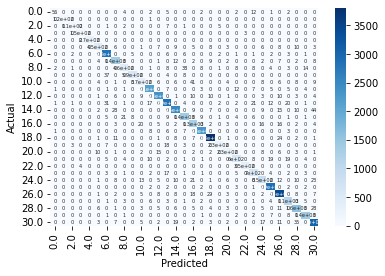

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(test_y, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(test_y), index = np.unique(test_y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 5})# font size

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

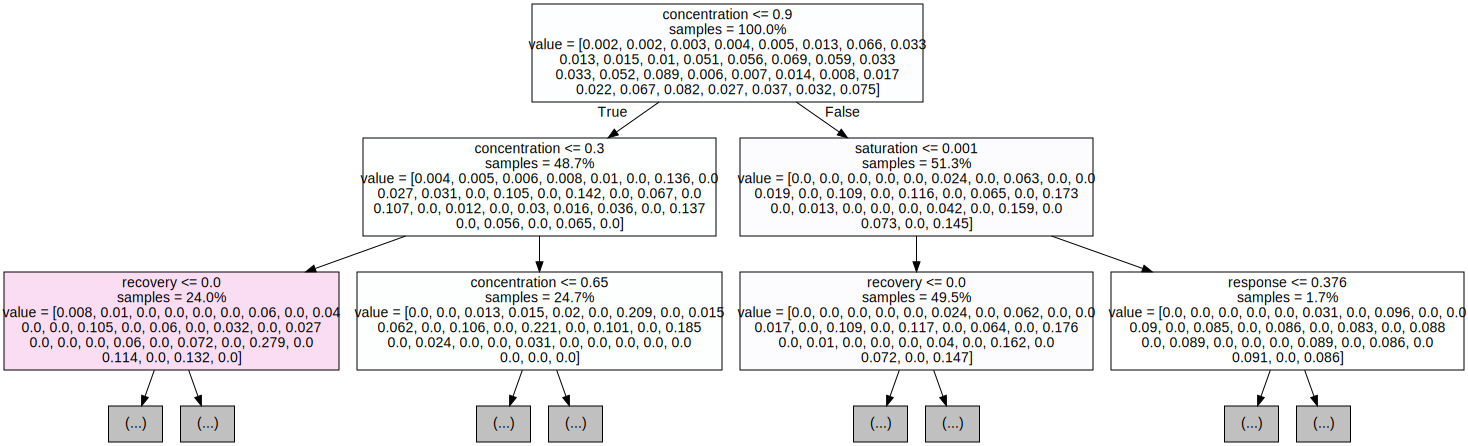

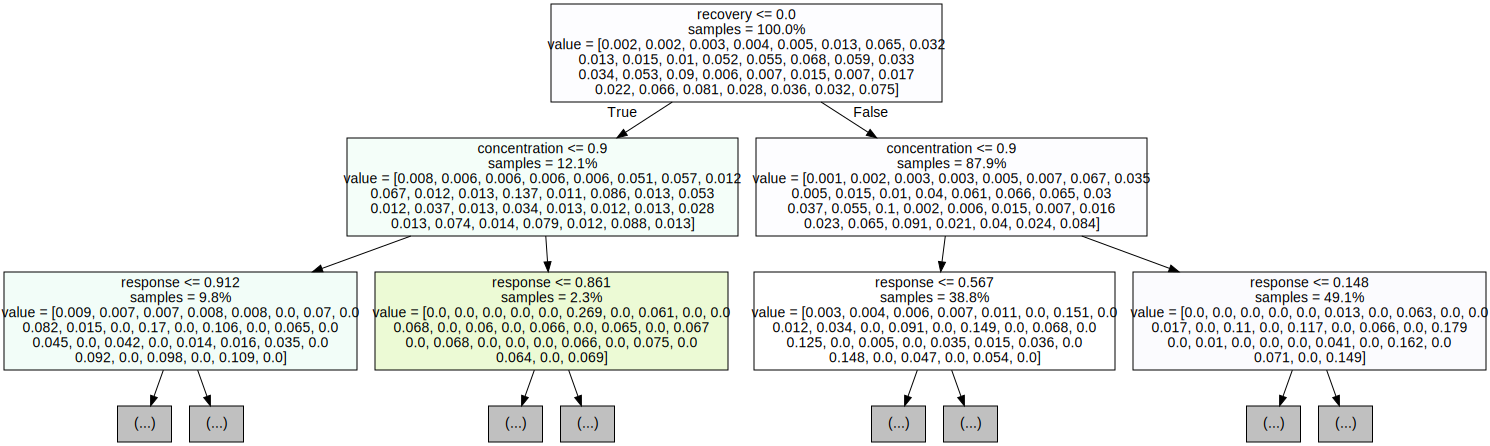

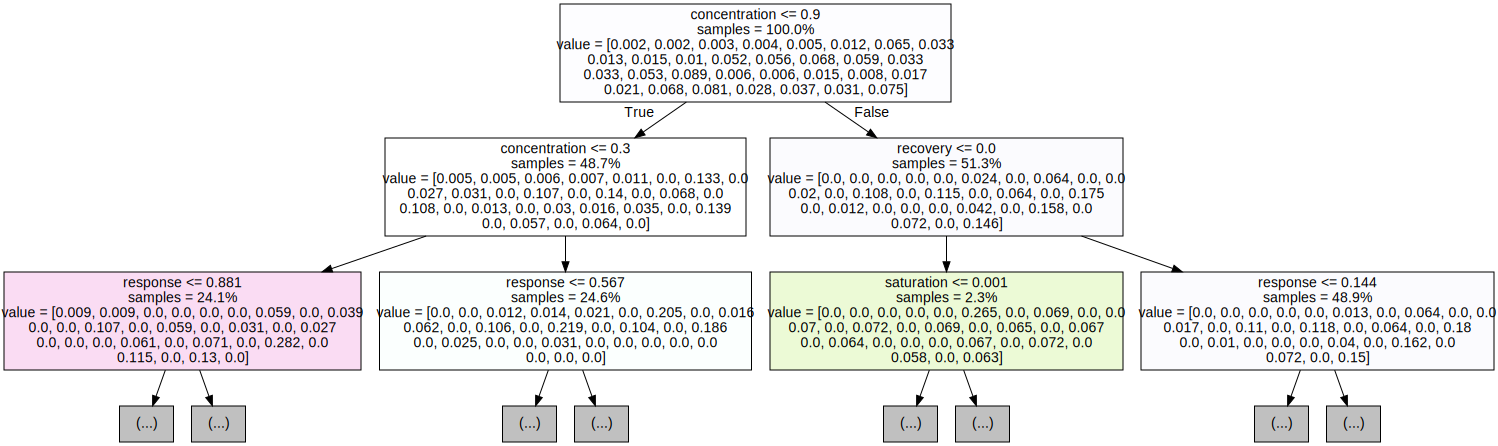

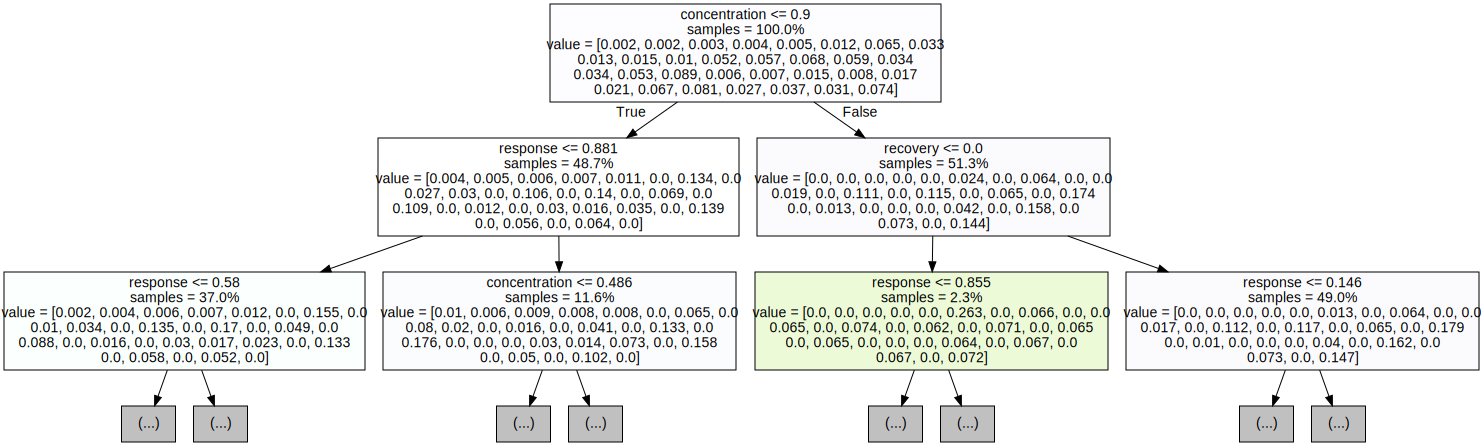

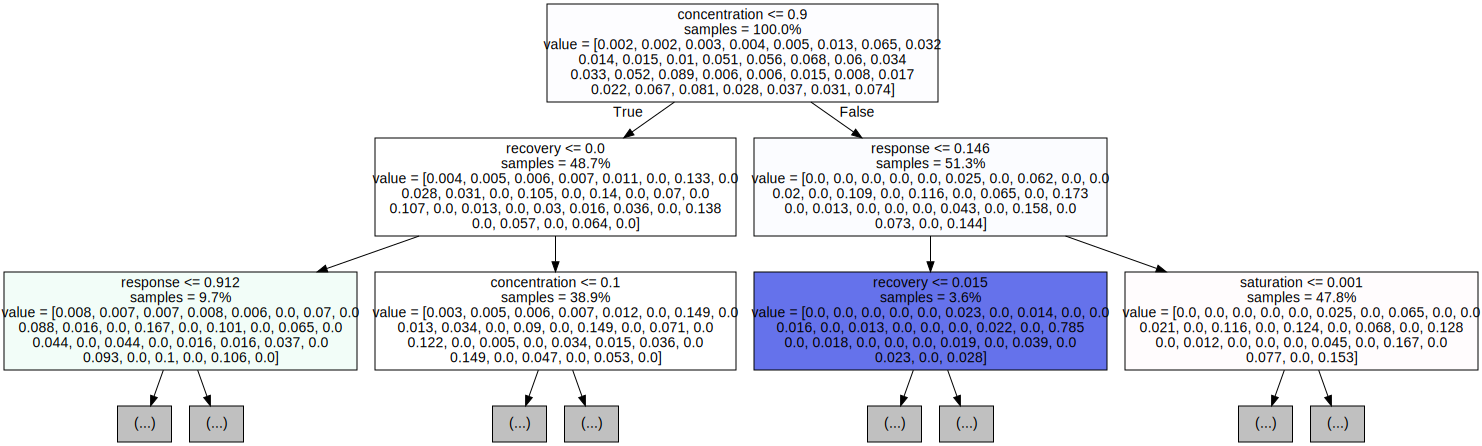

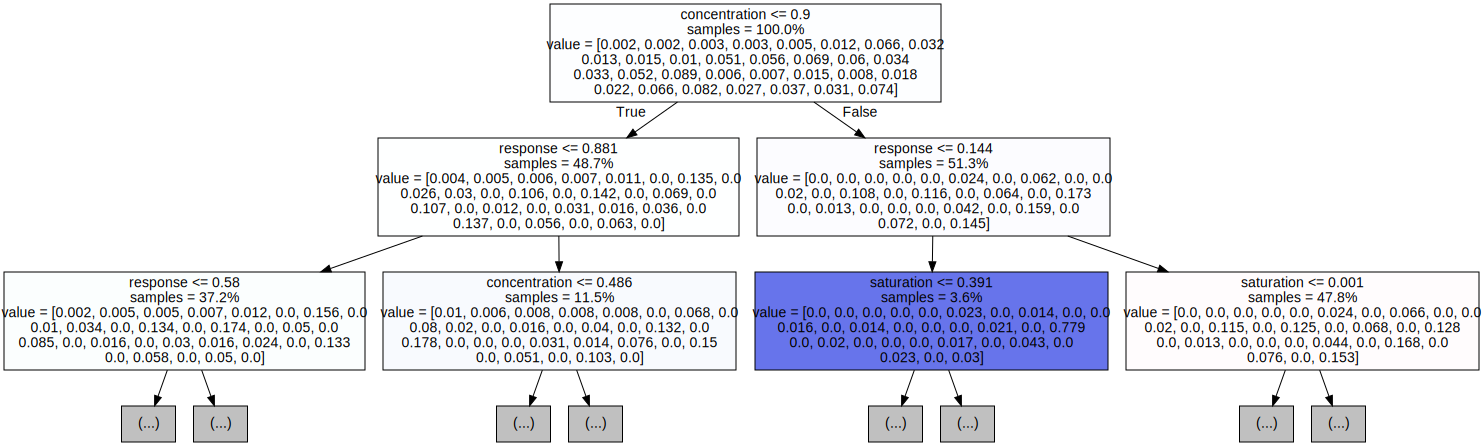

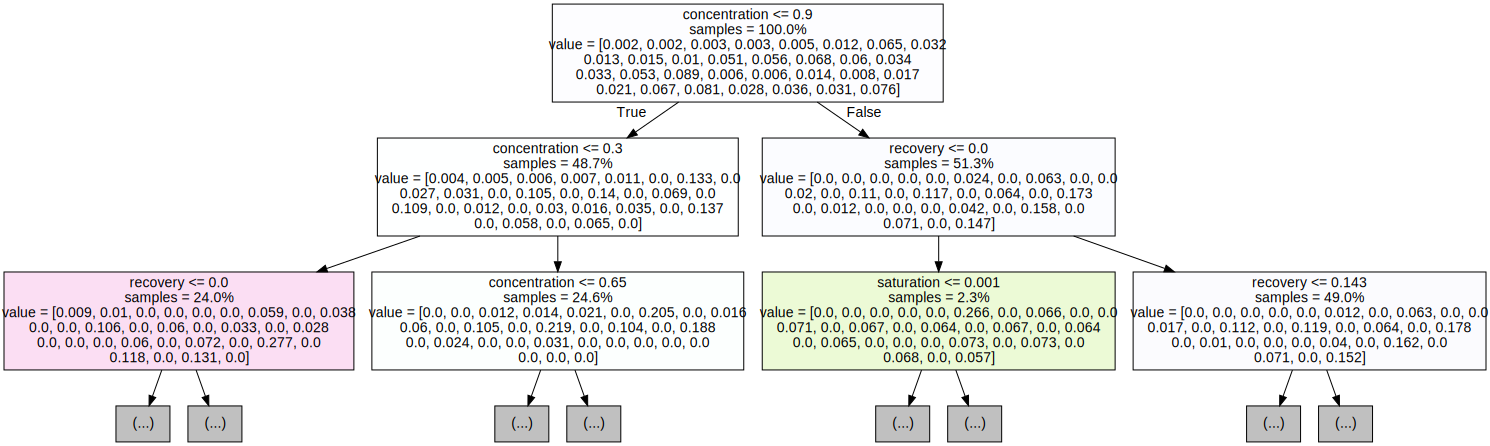

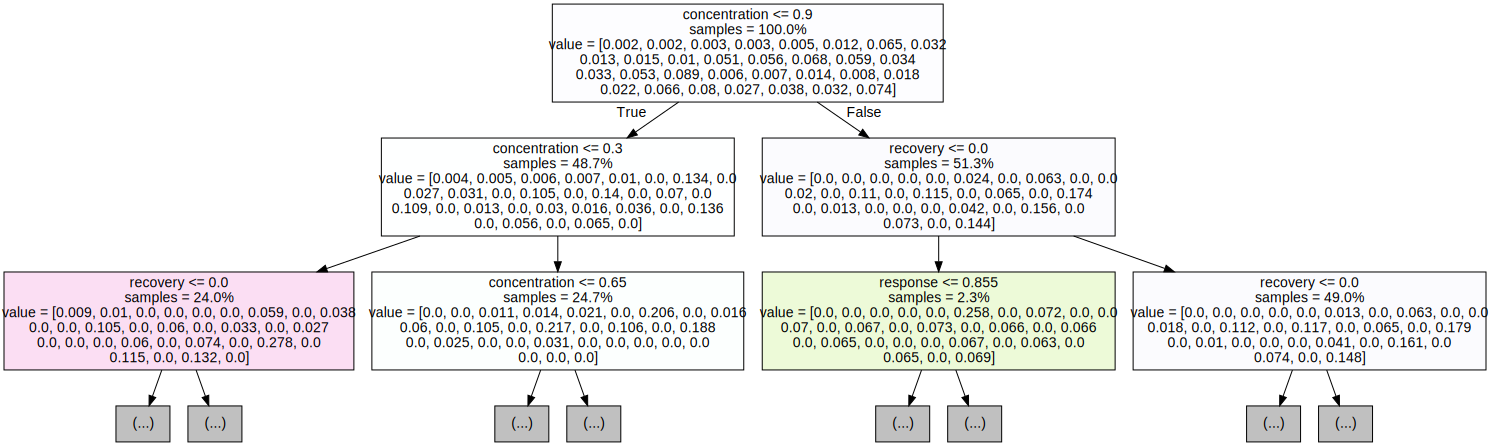

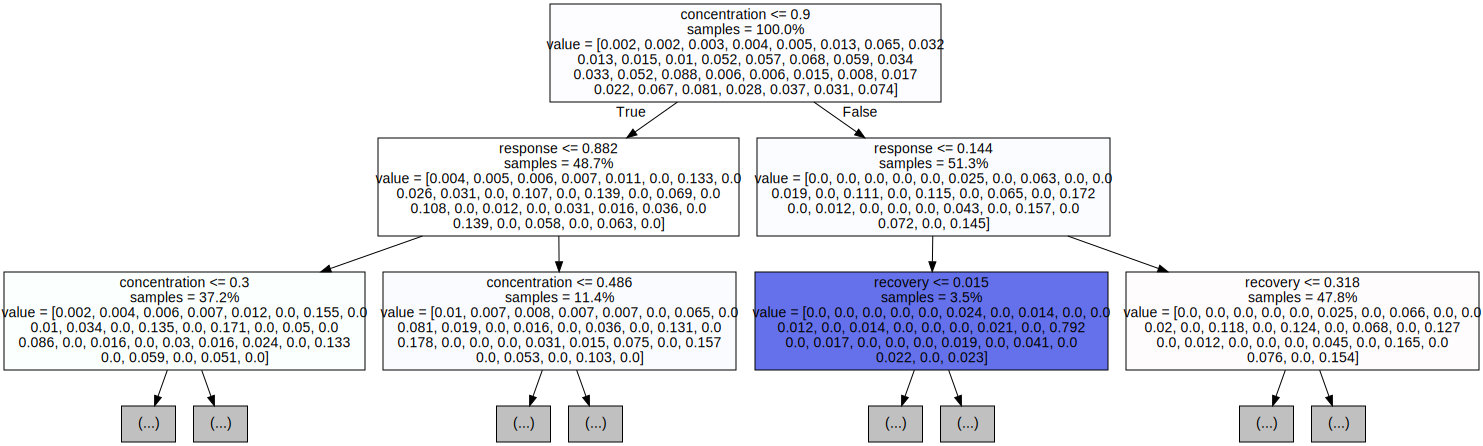

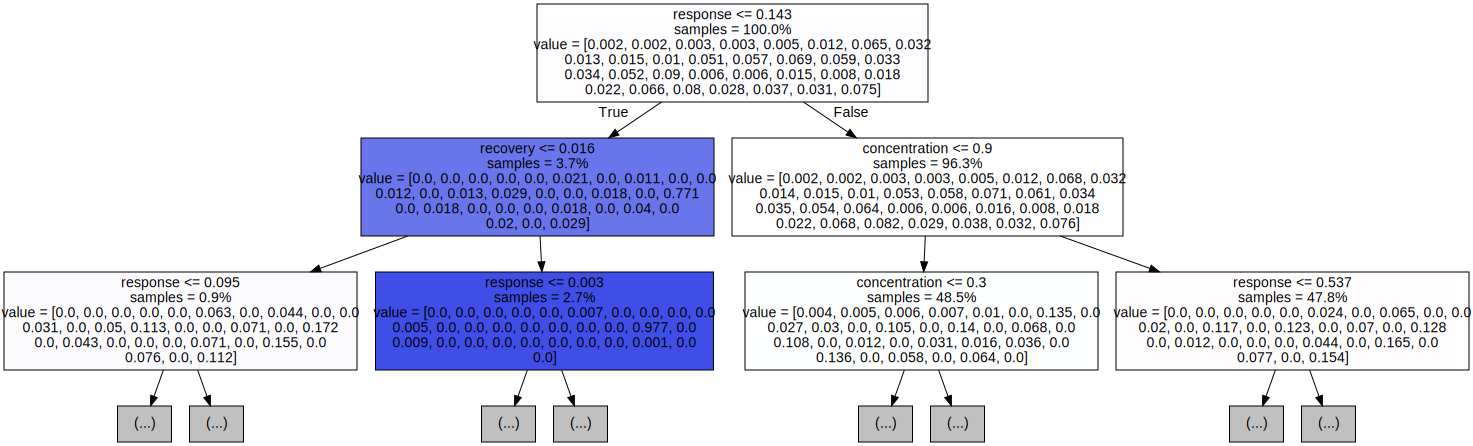

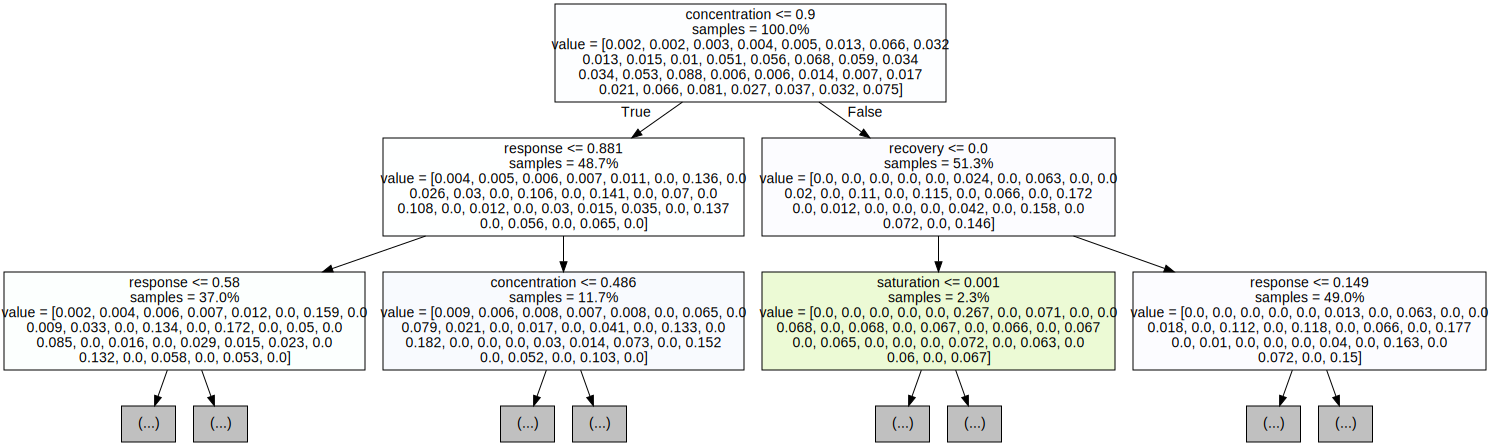

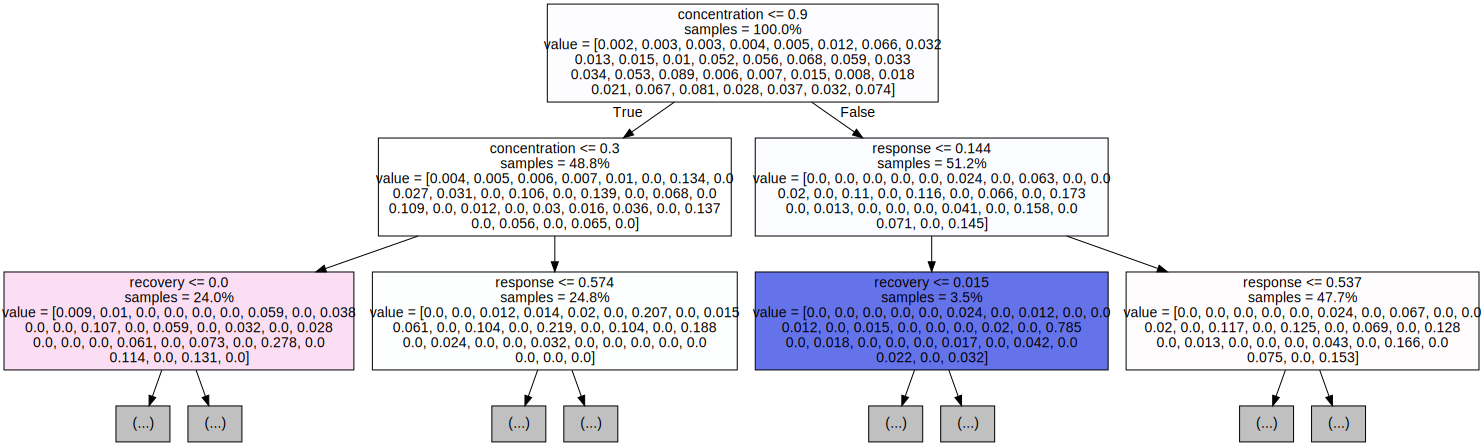

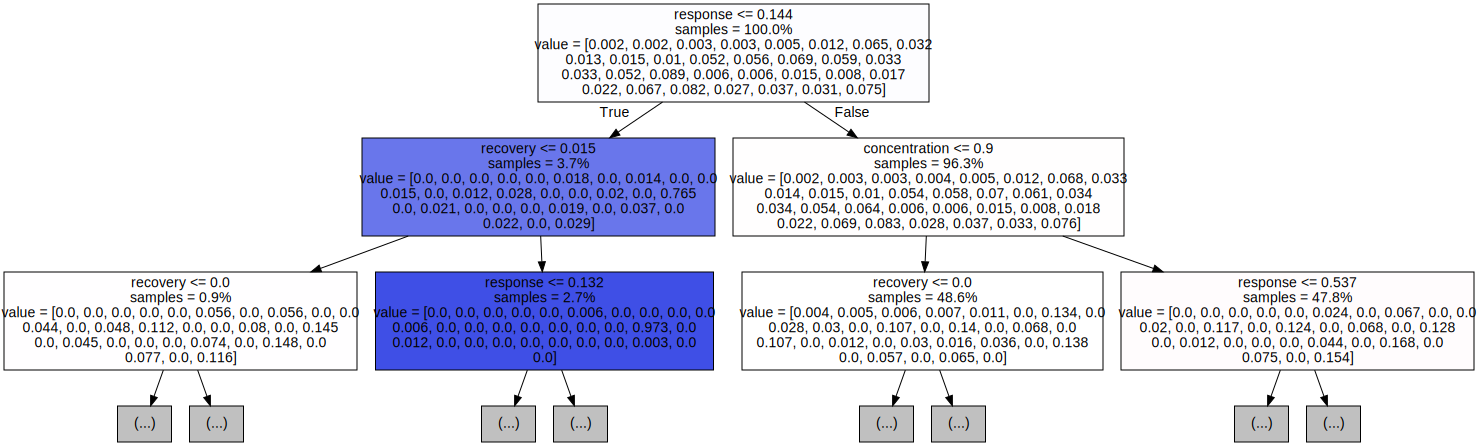

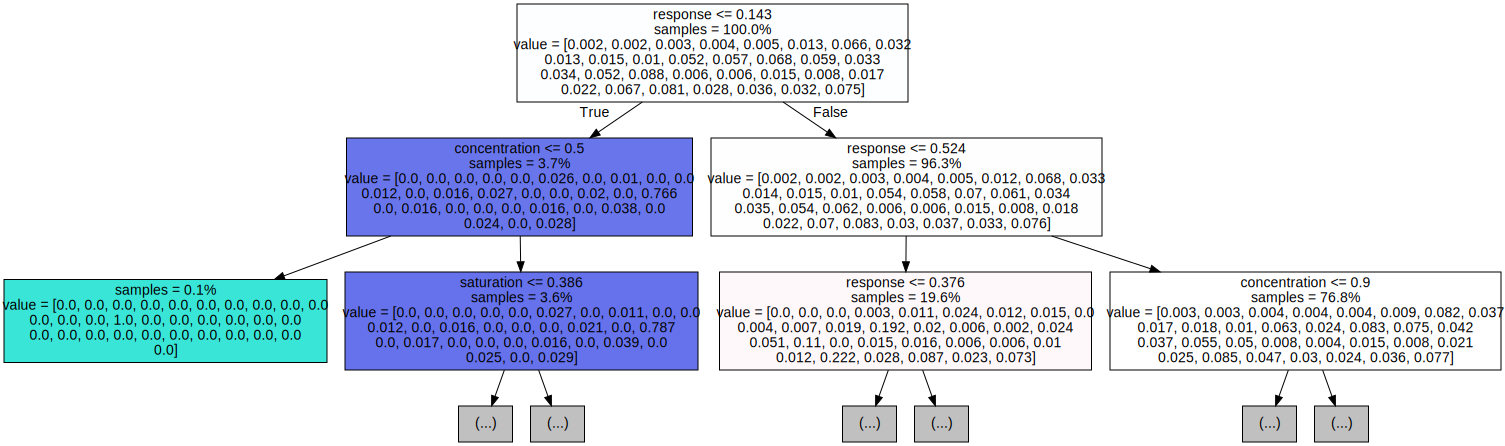

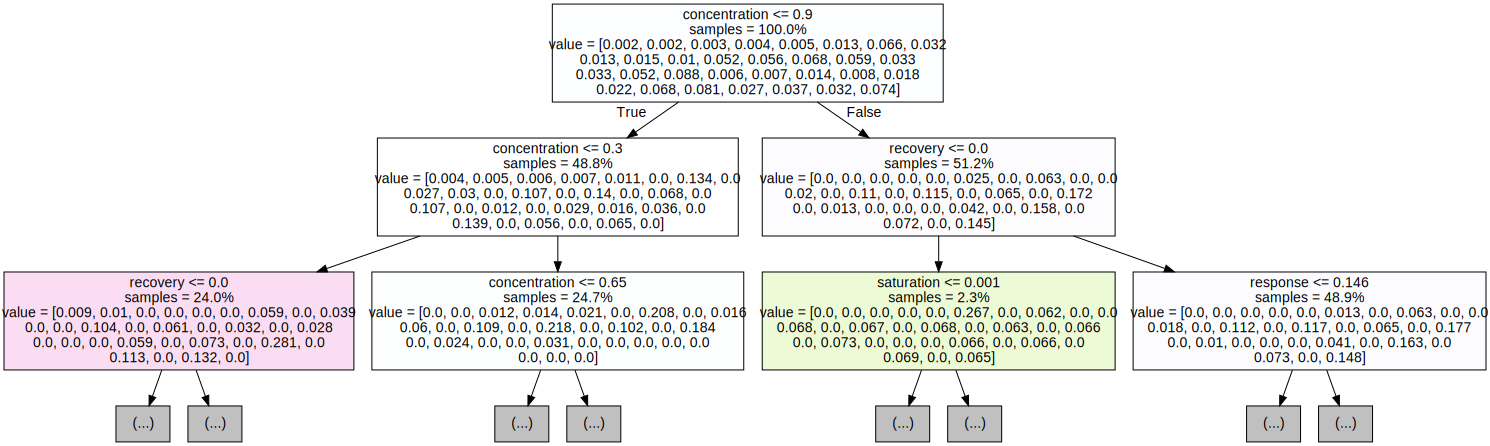

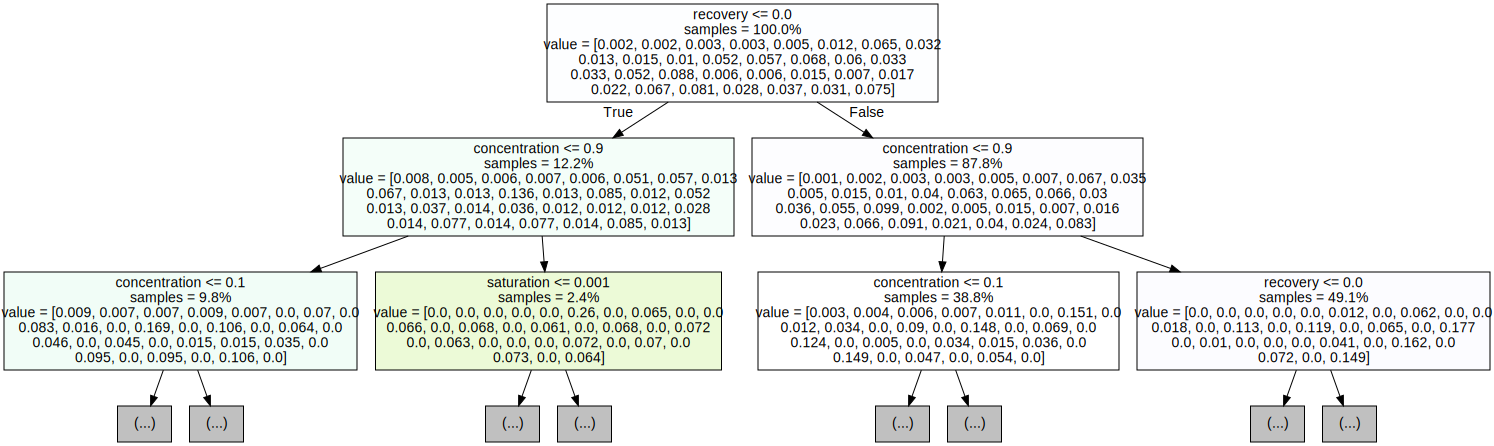

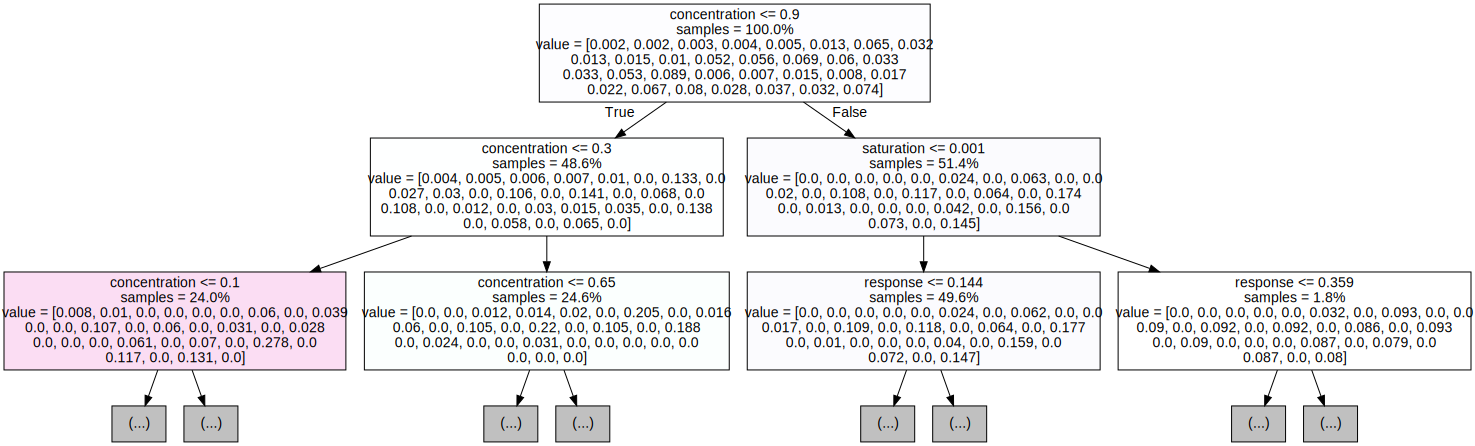

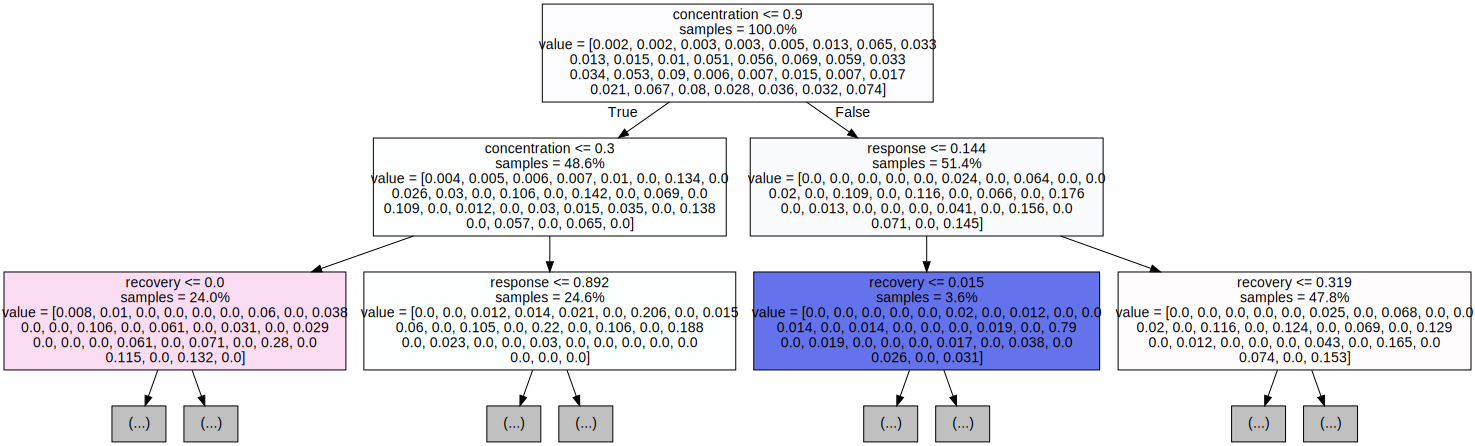

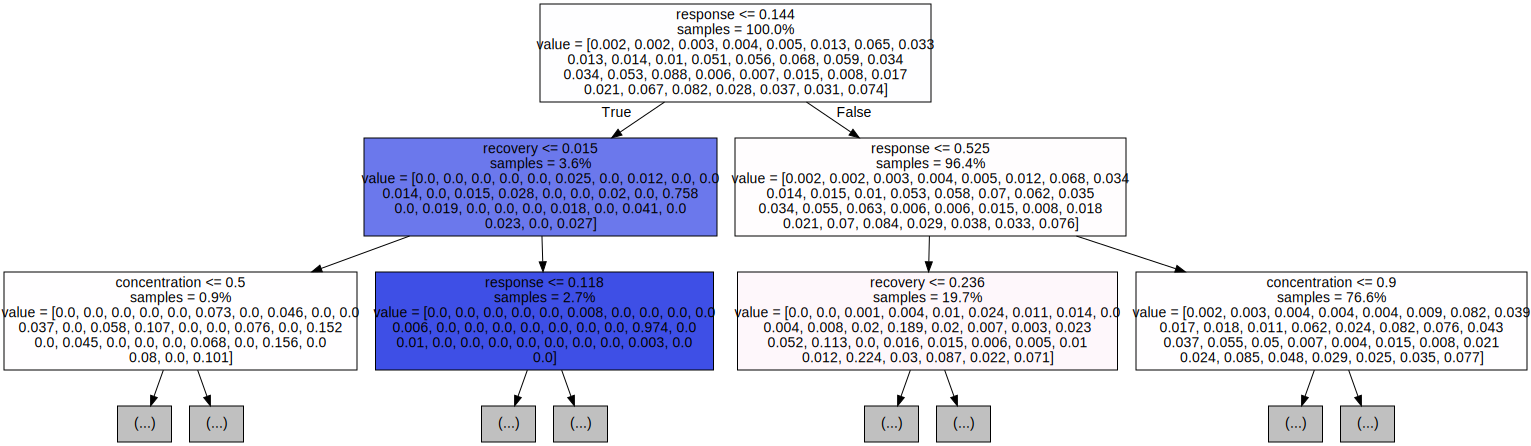

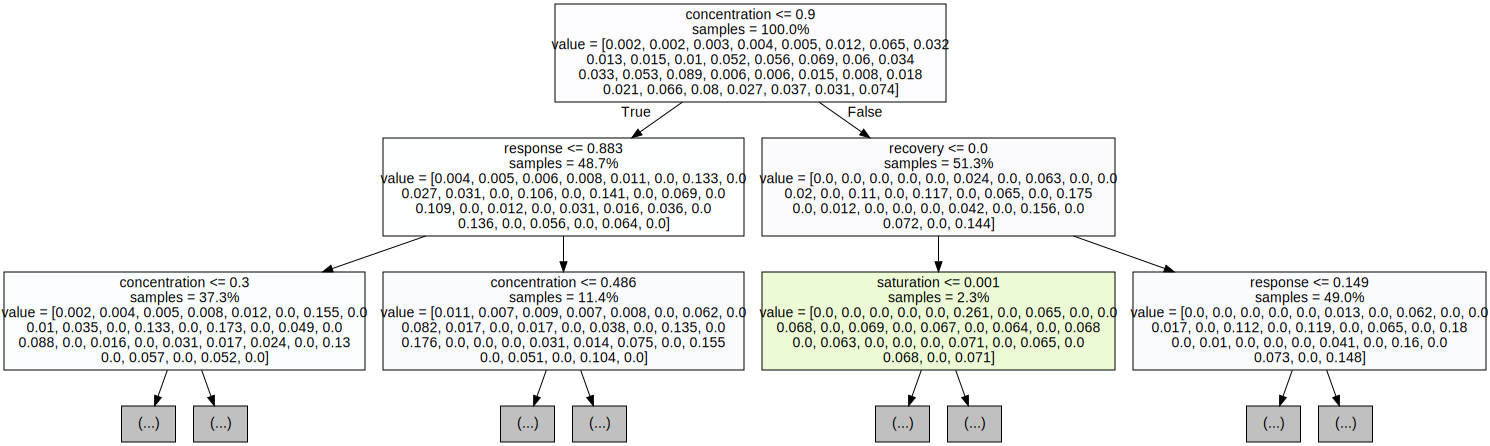

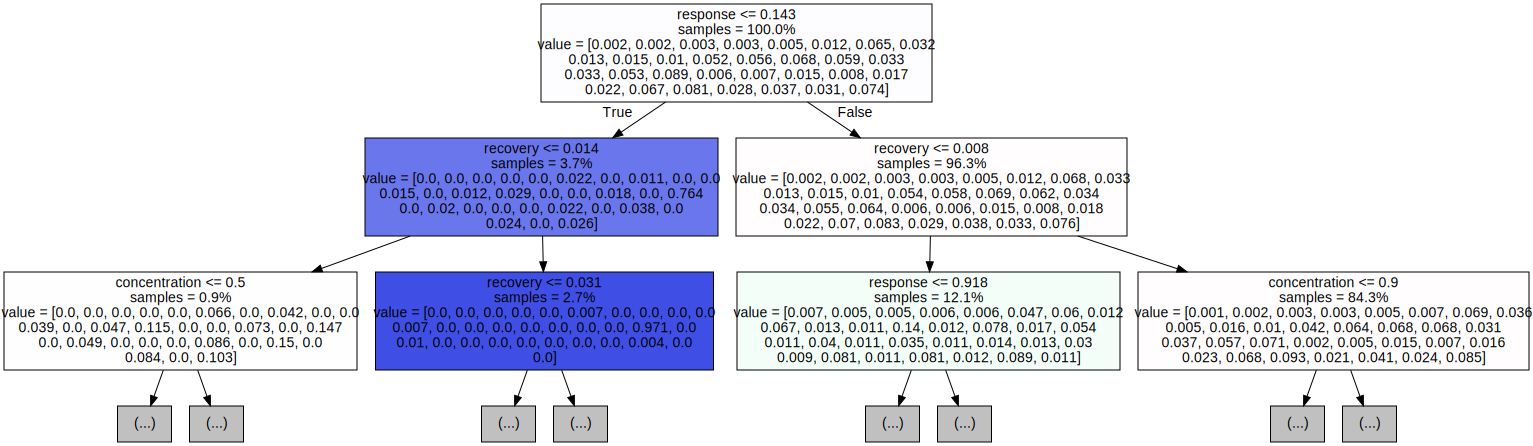

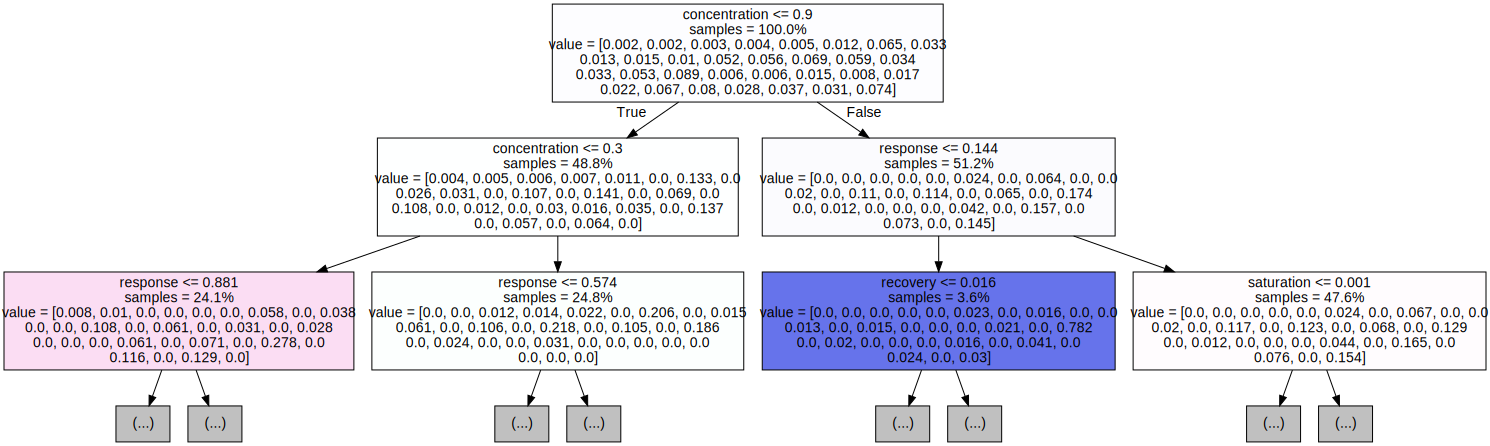

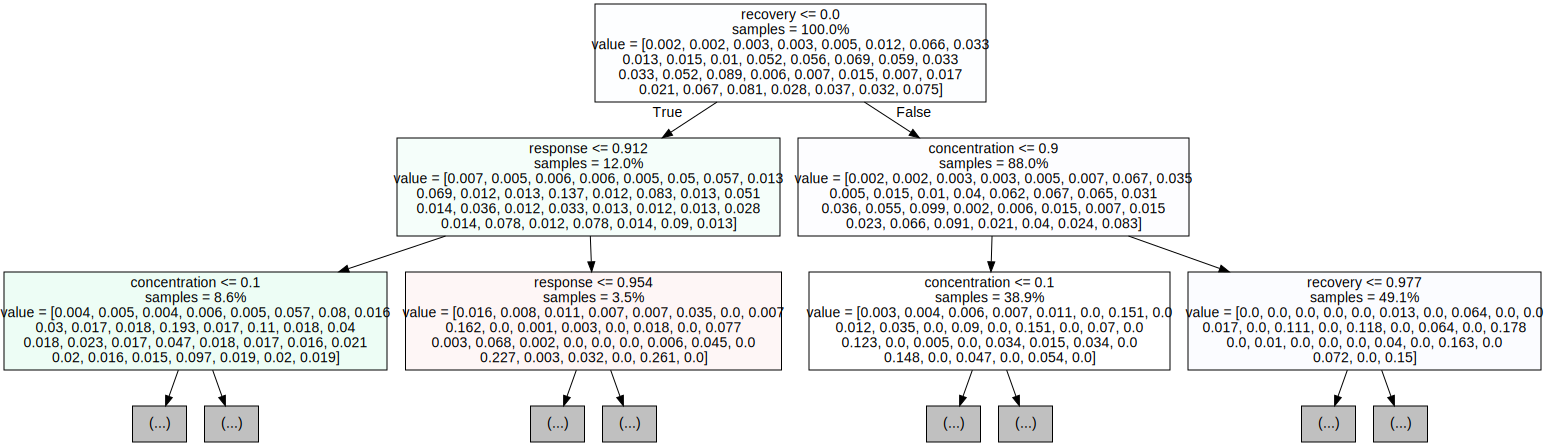

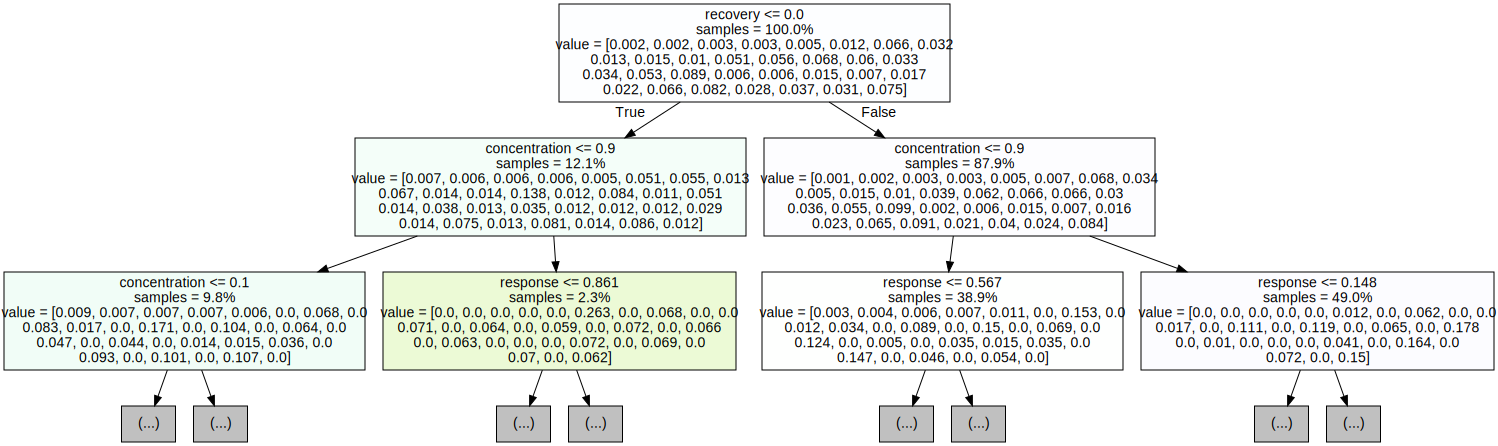

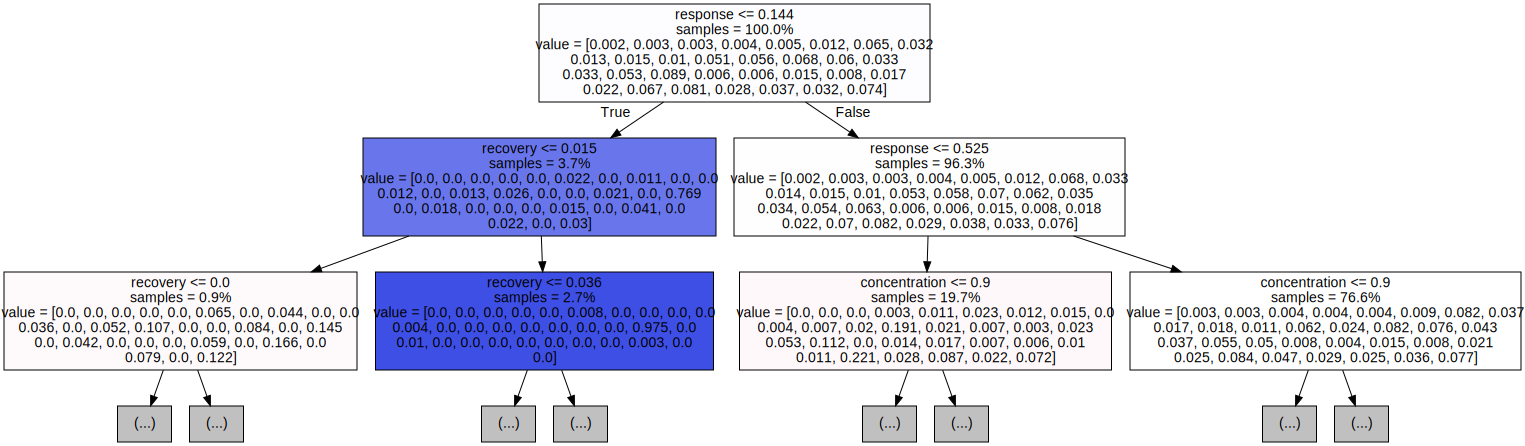

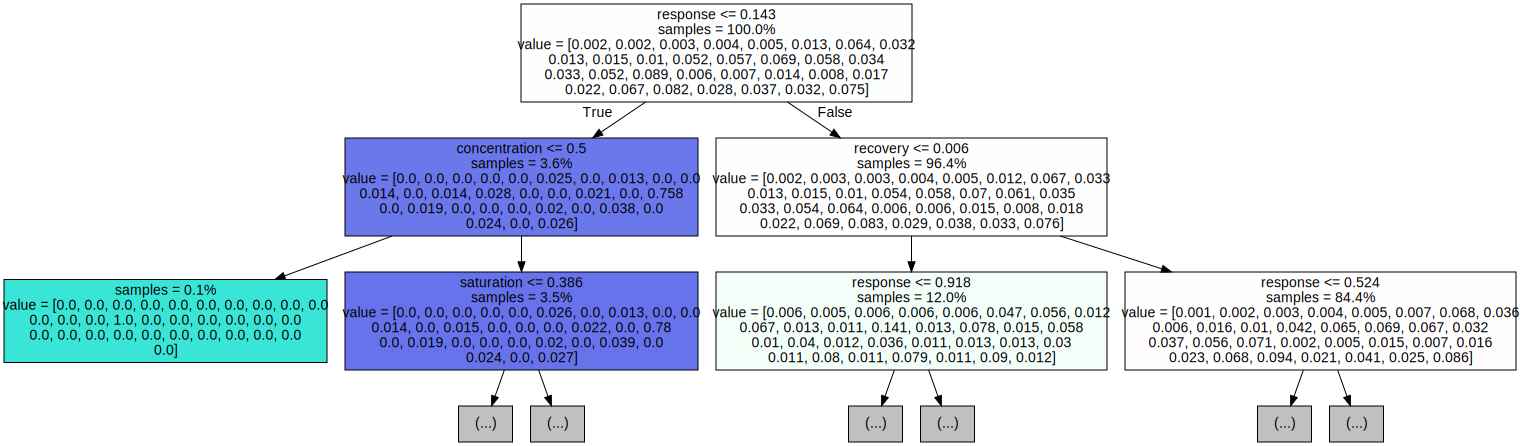

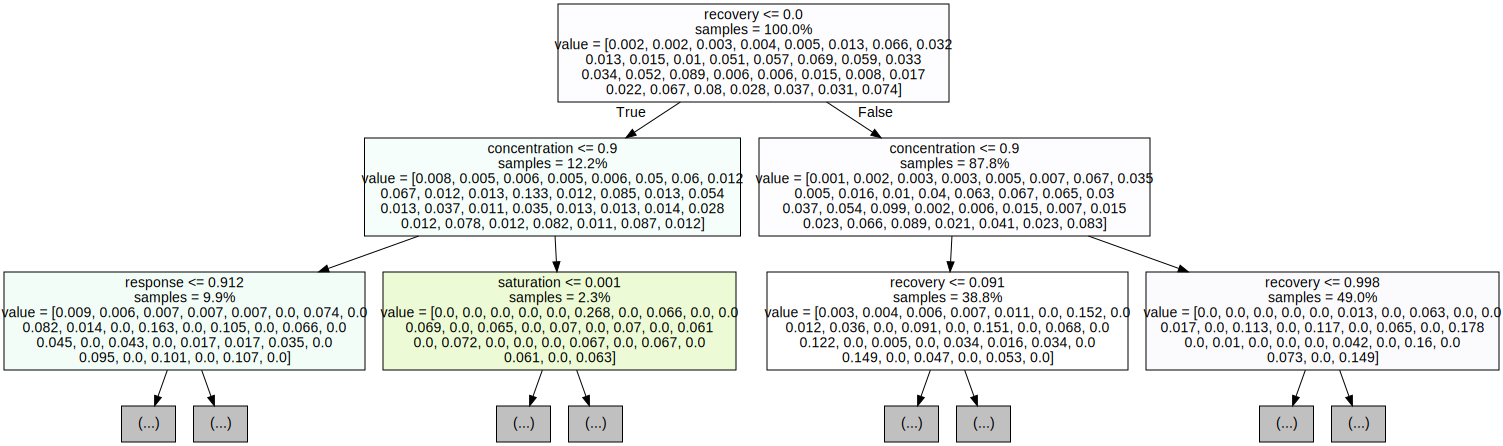

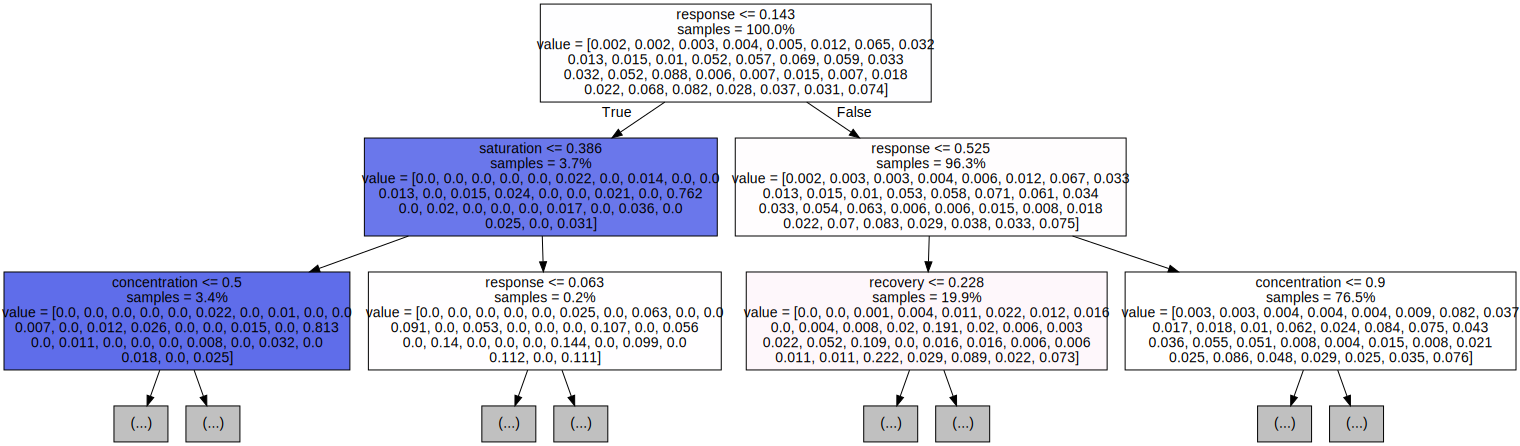

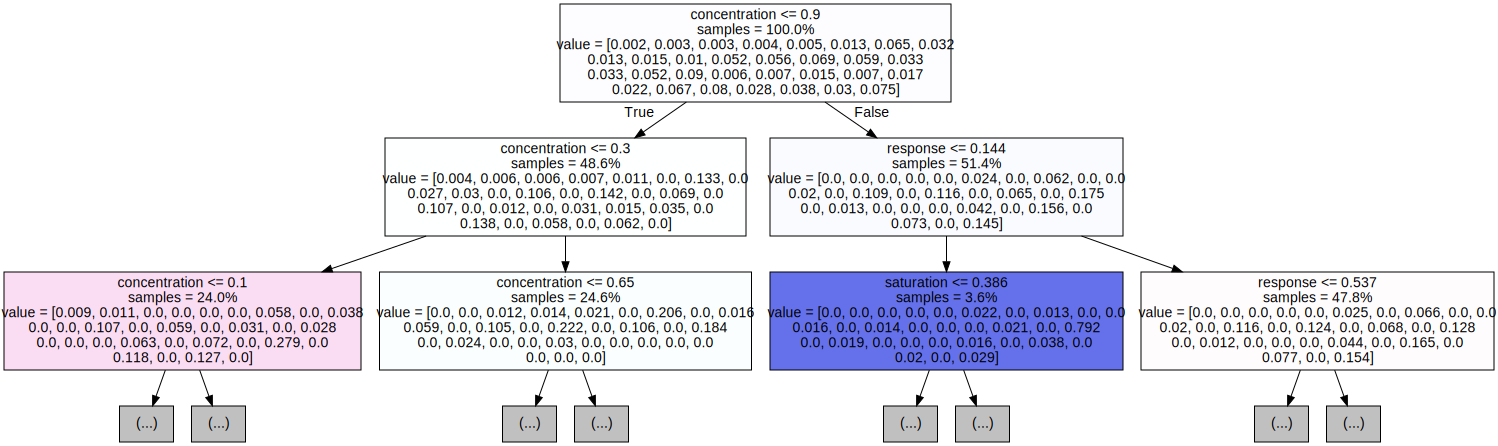

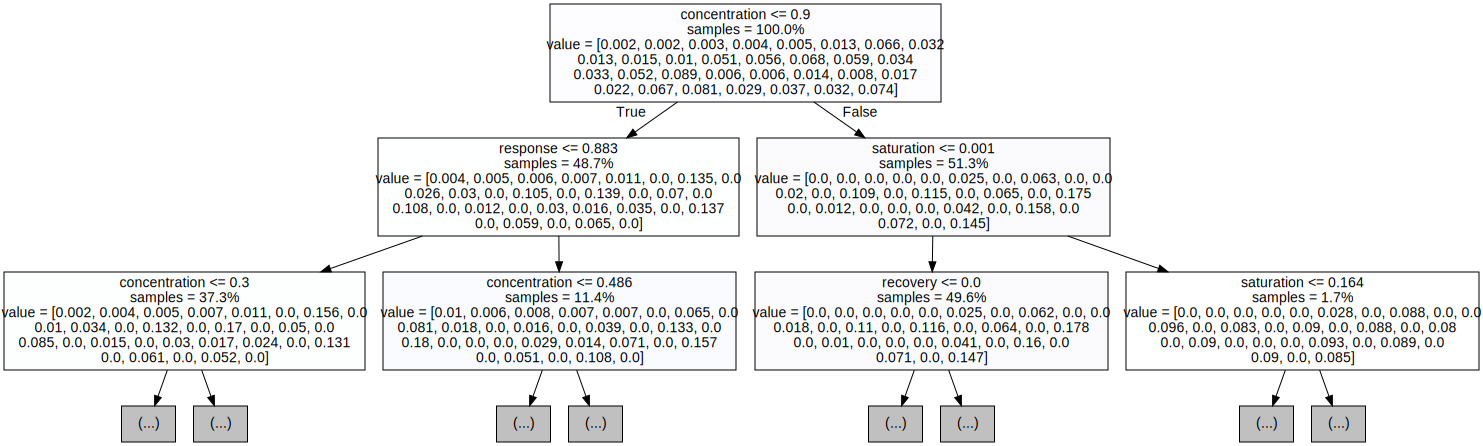

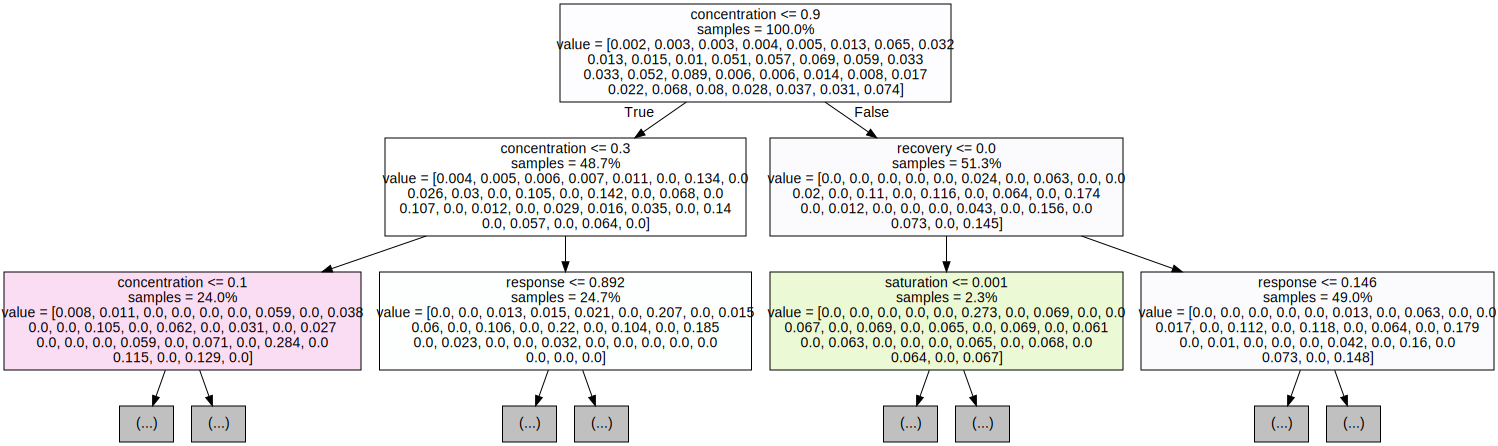

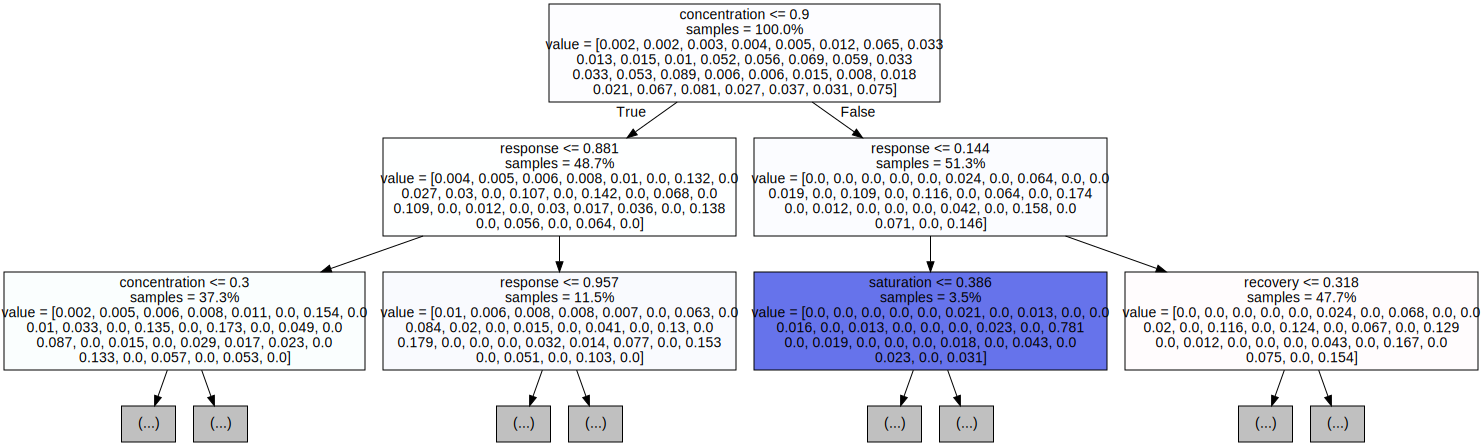

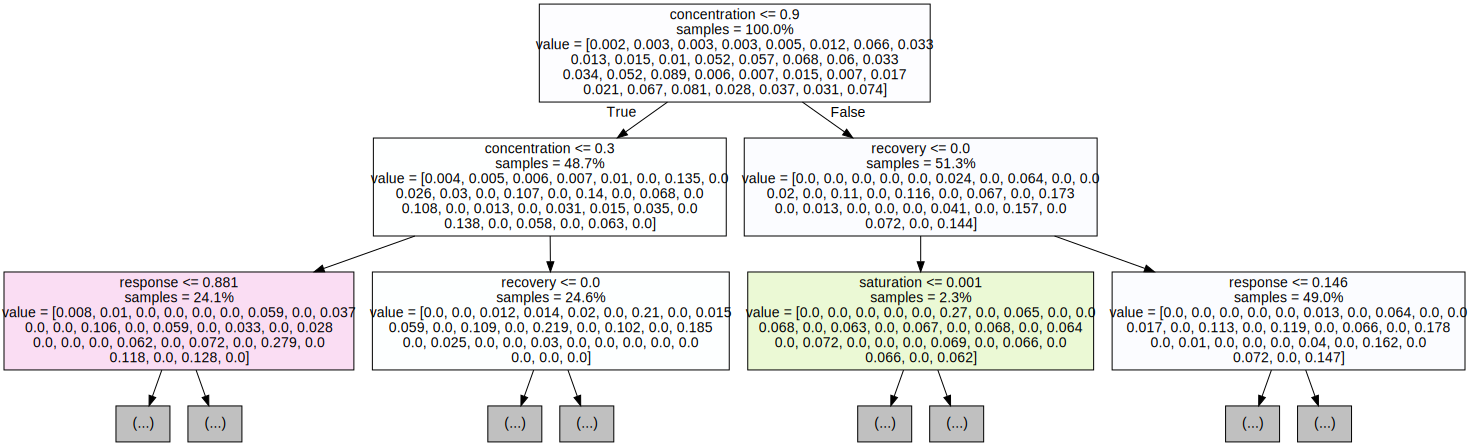

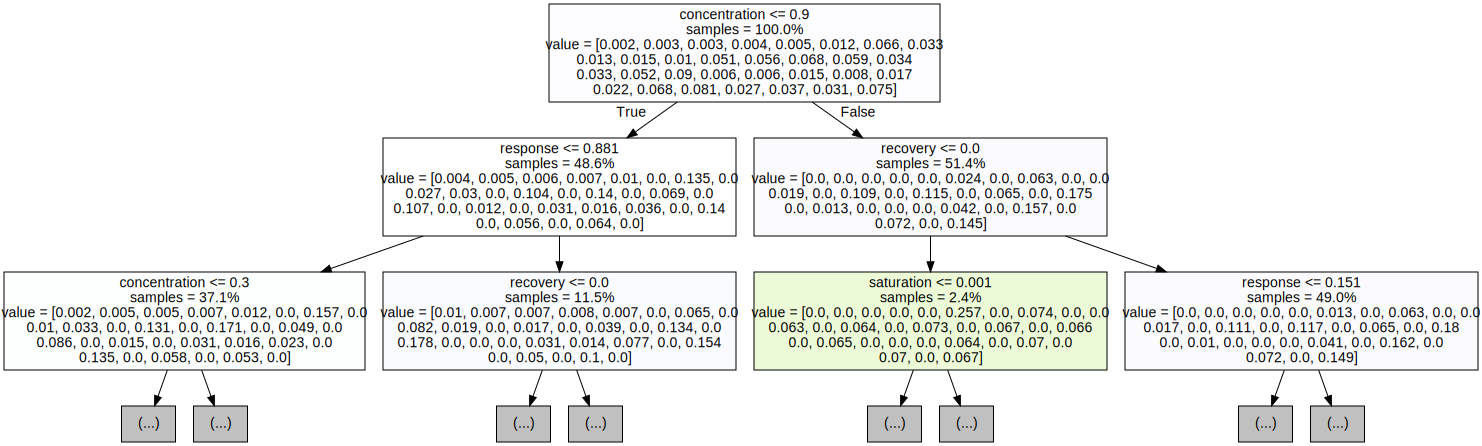

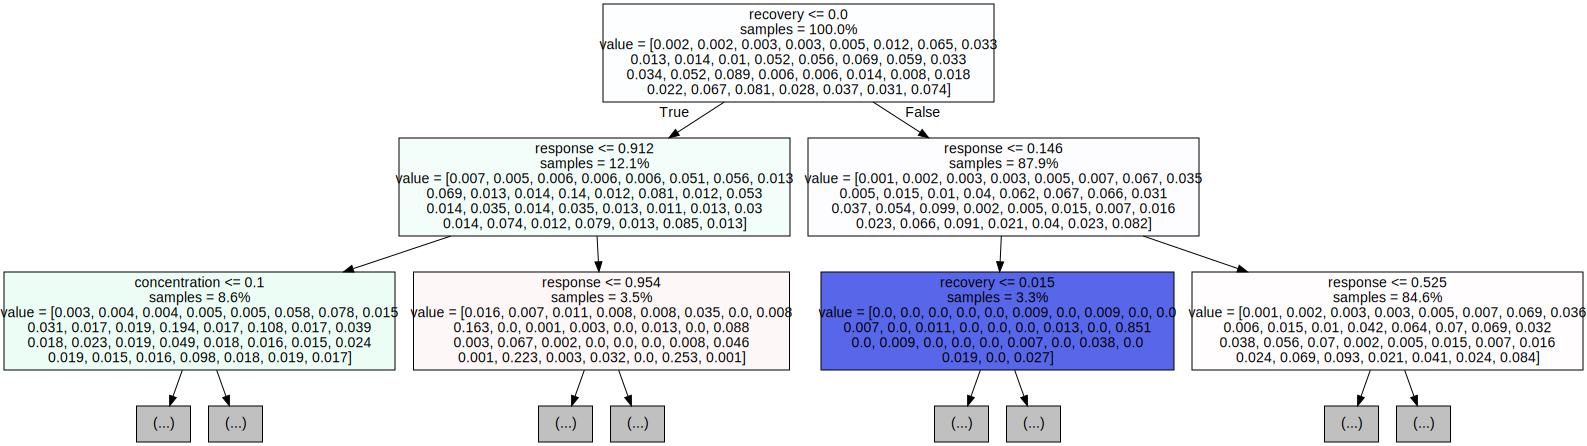

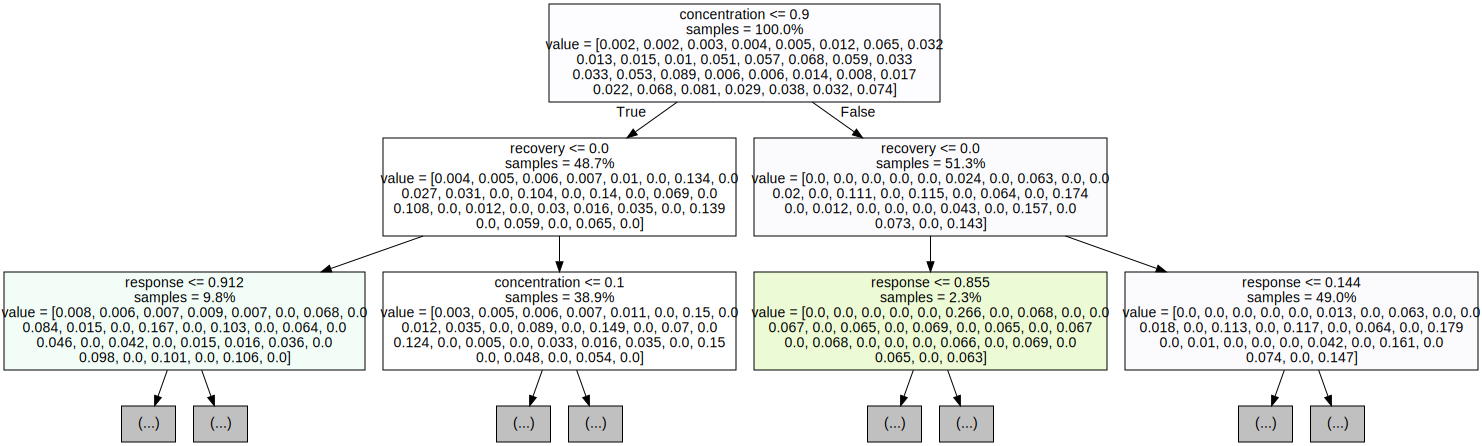

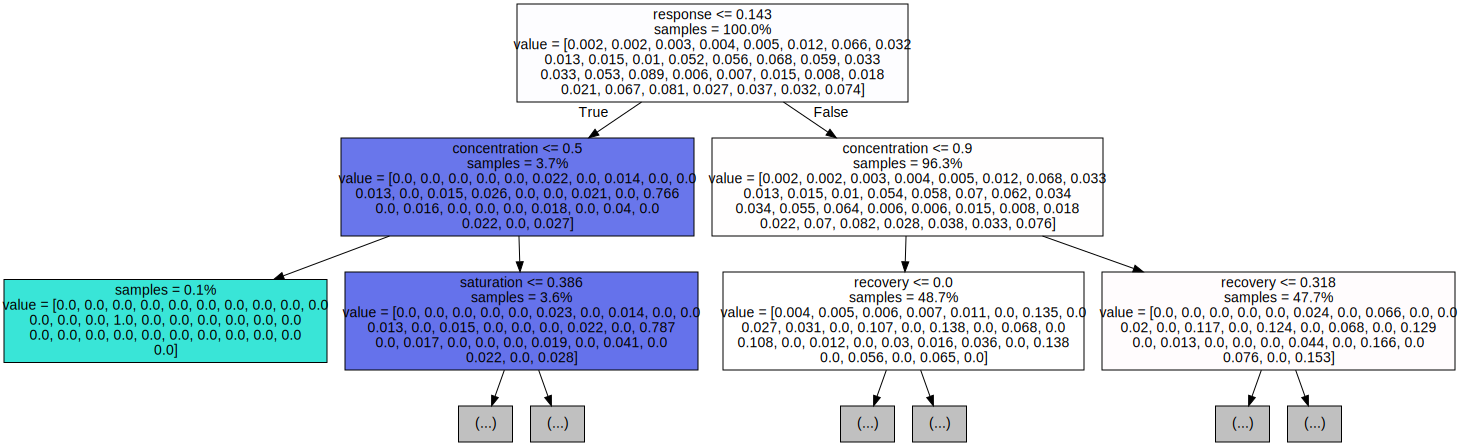

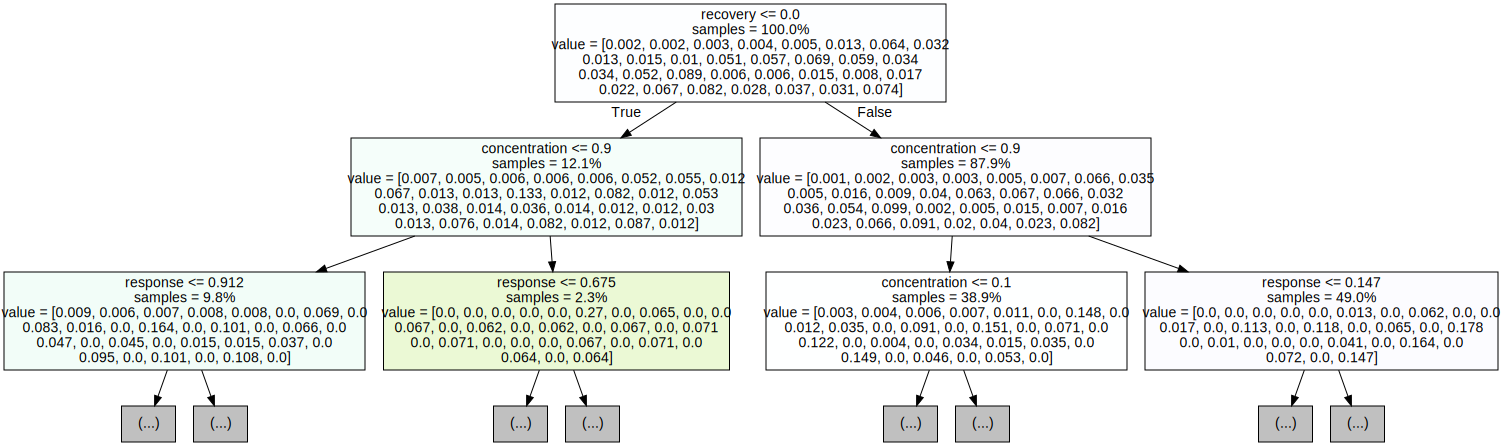

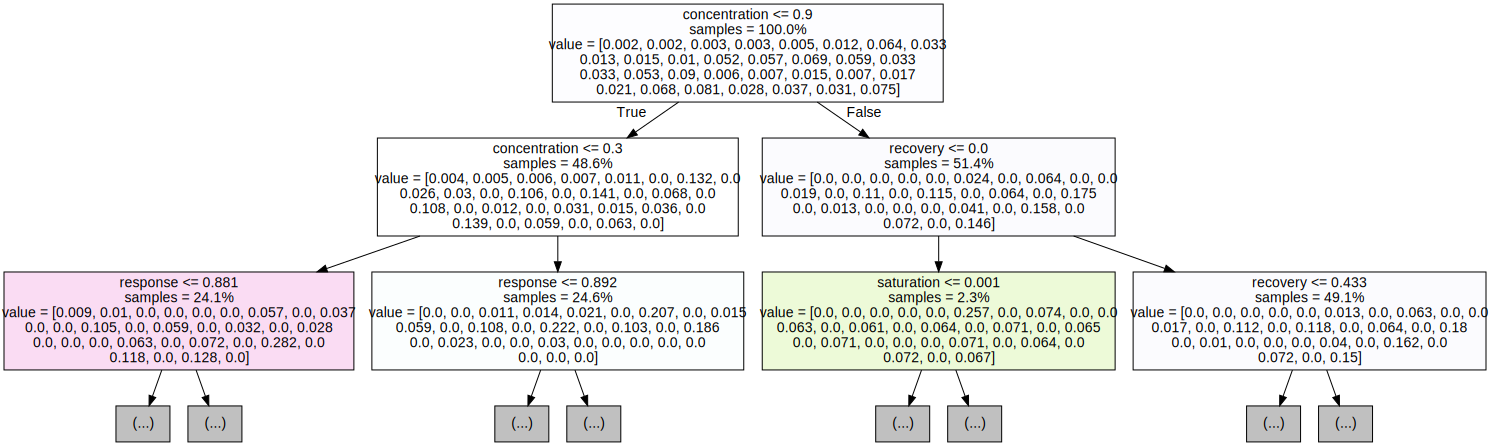

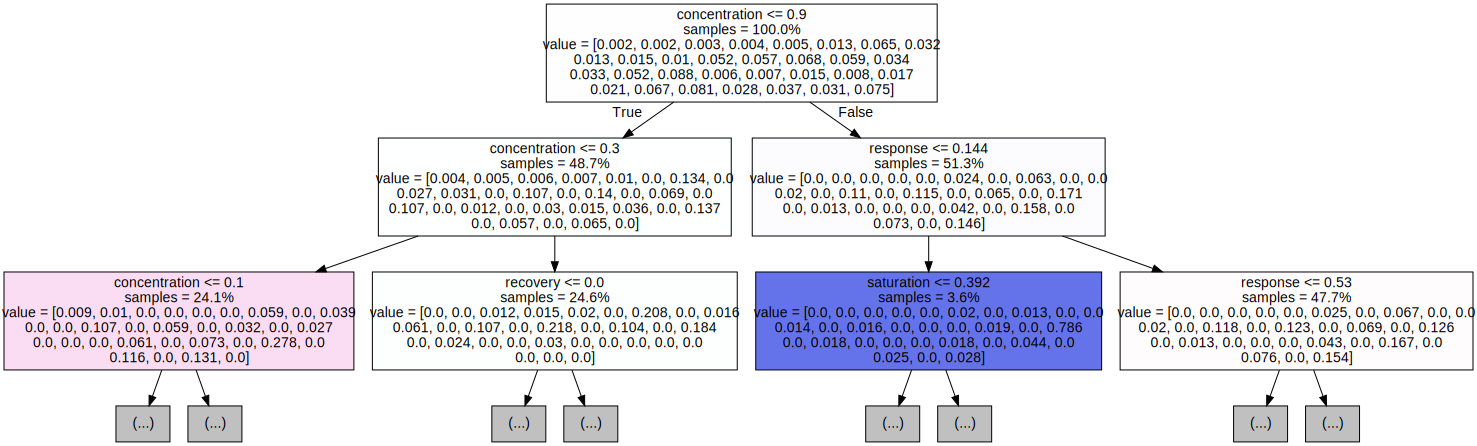

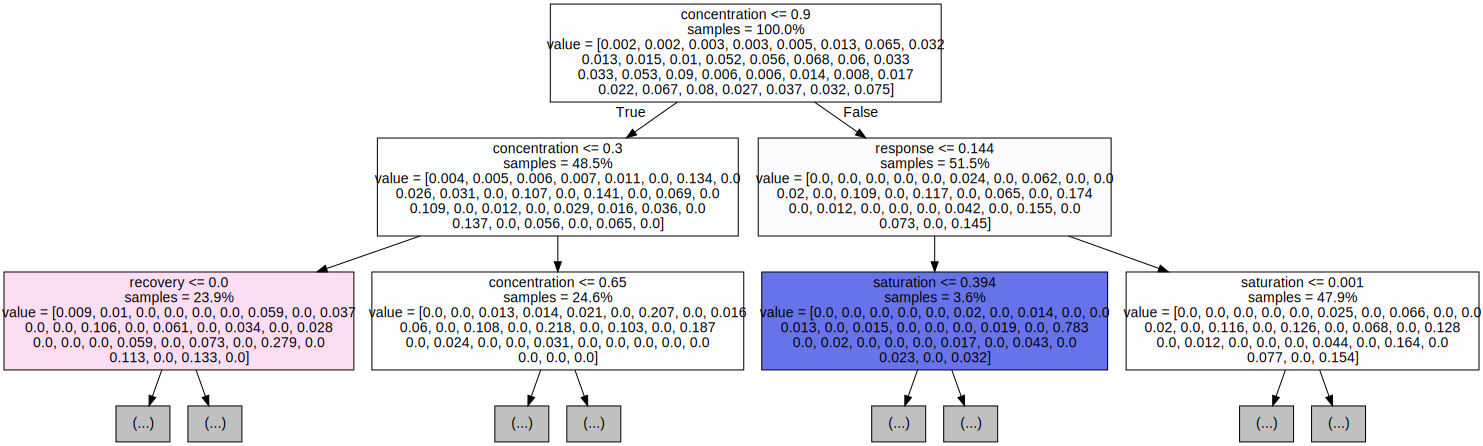

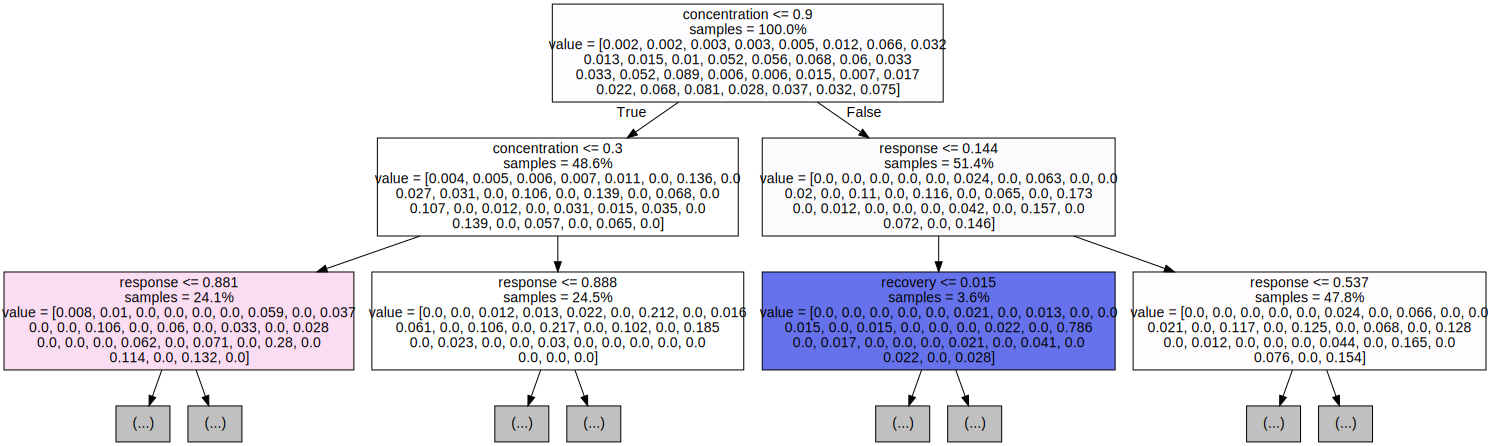

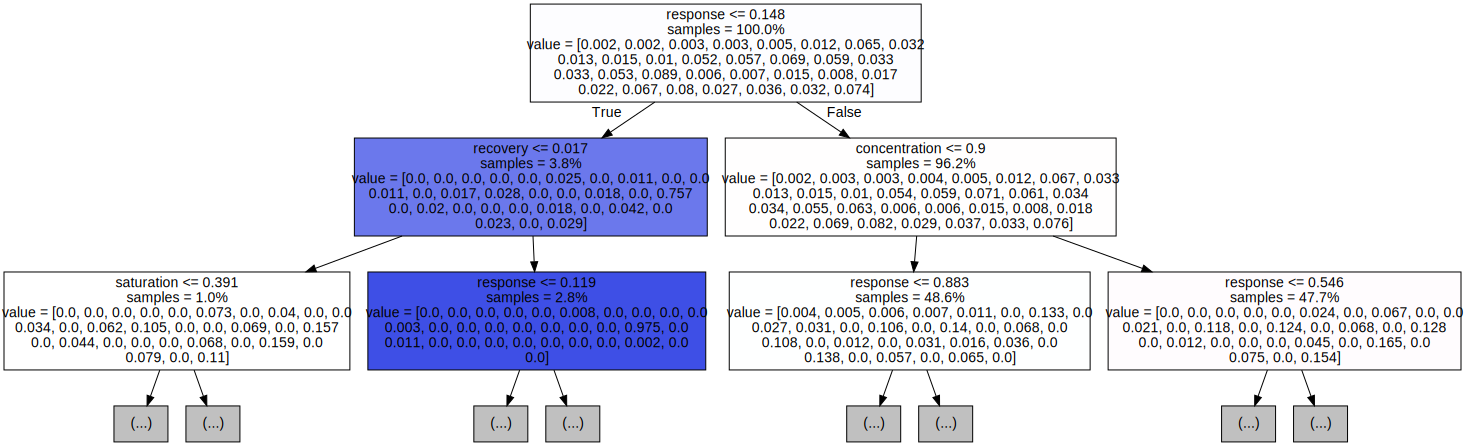

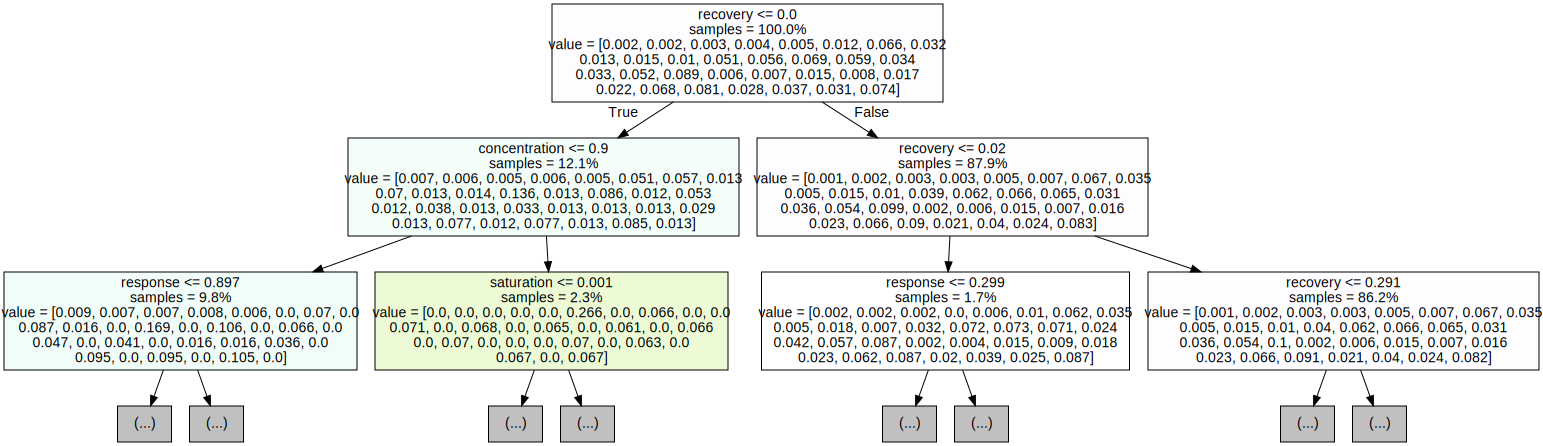

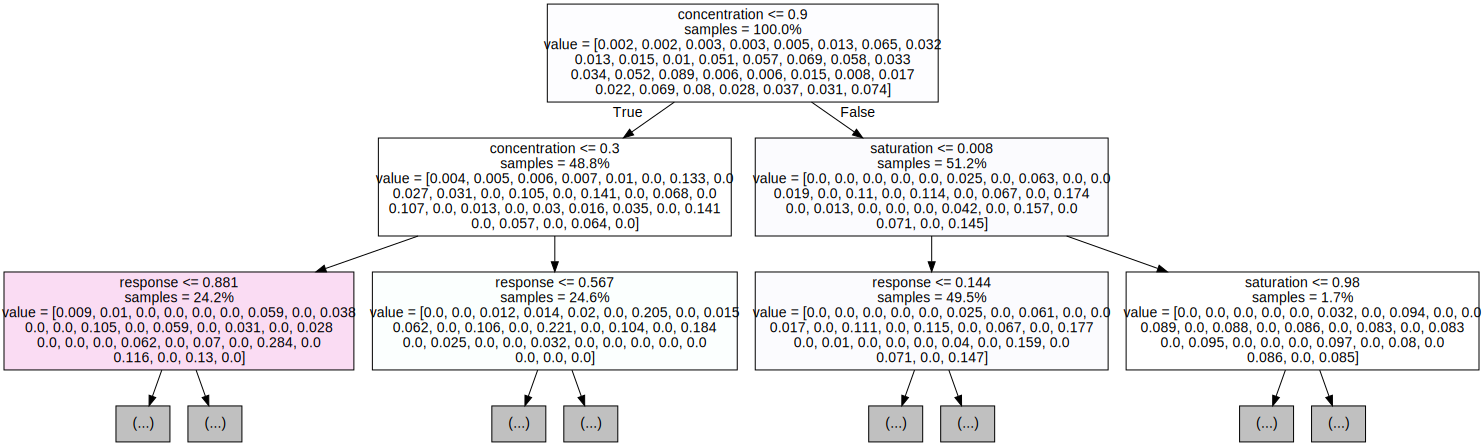

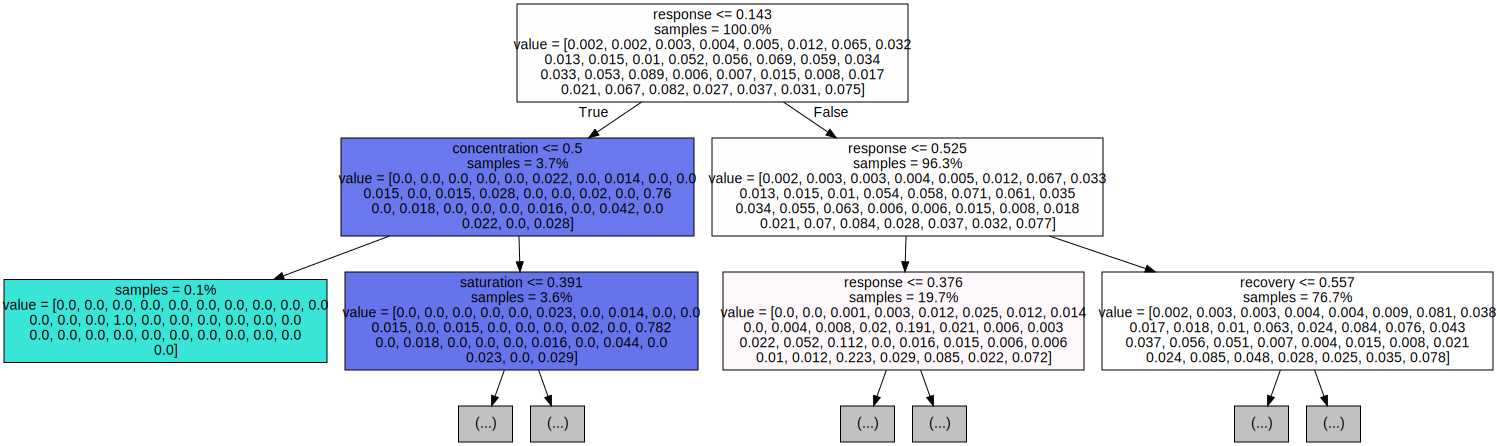

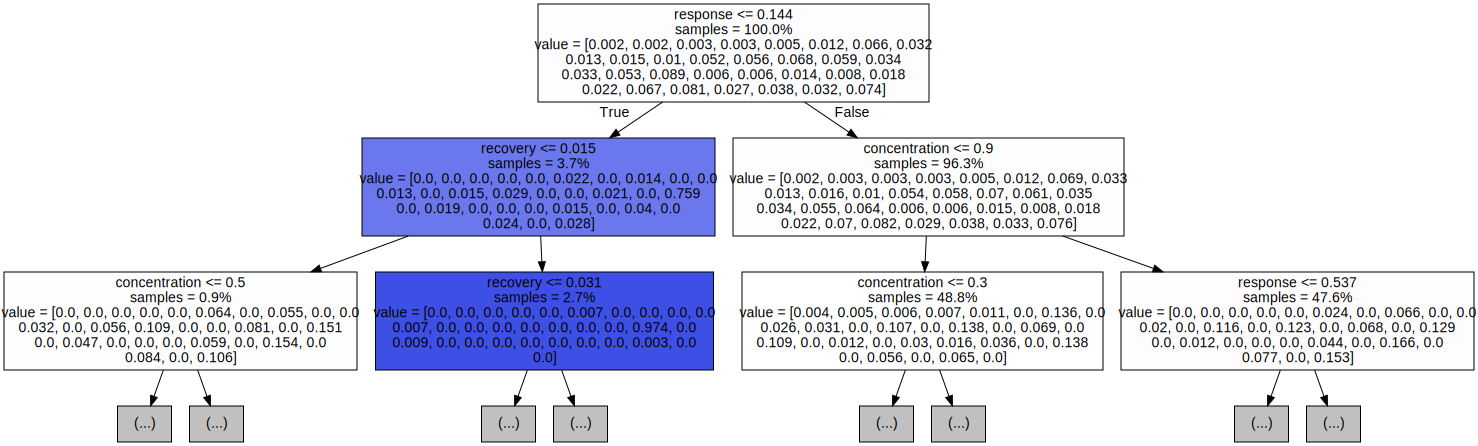

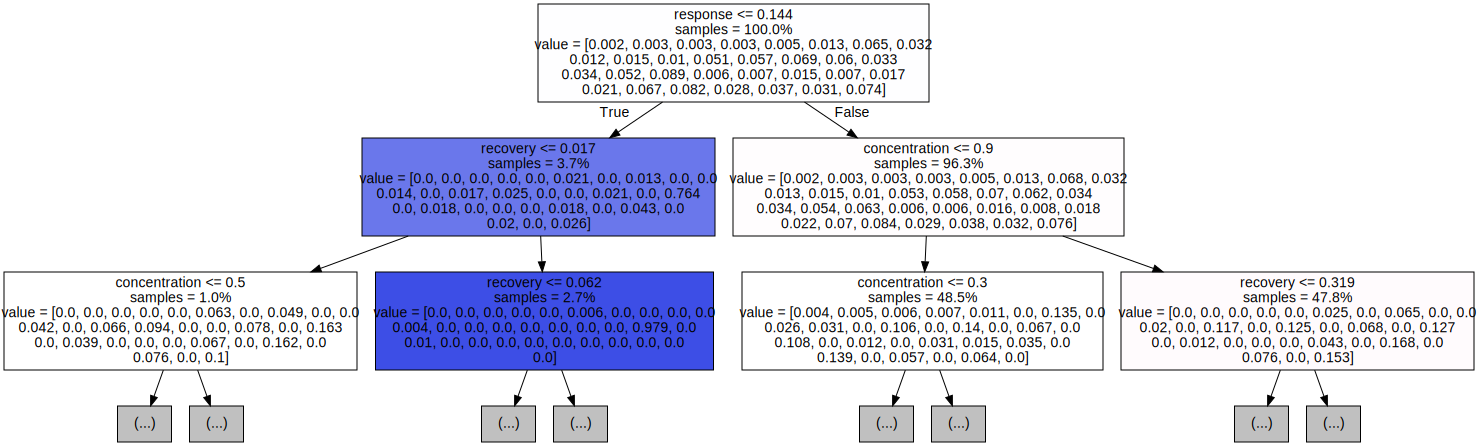

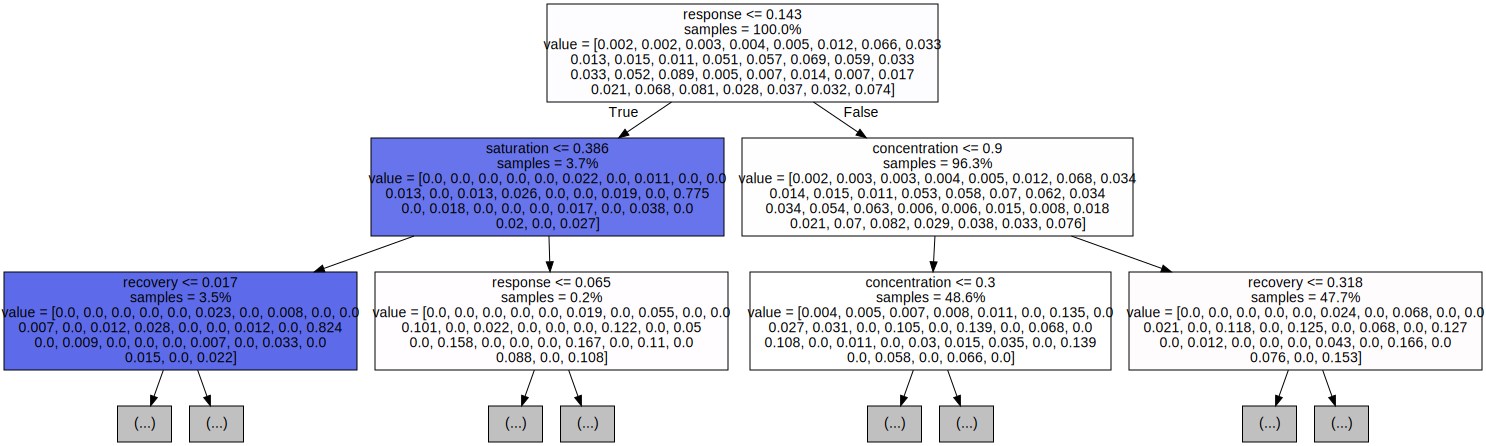

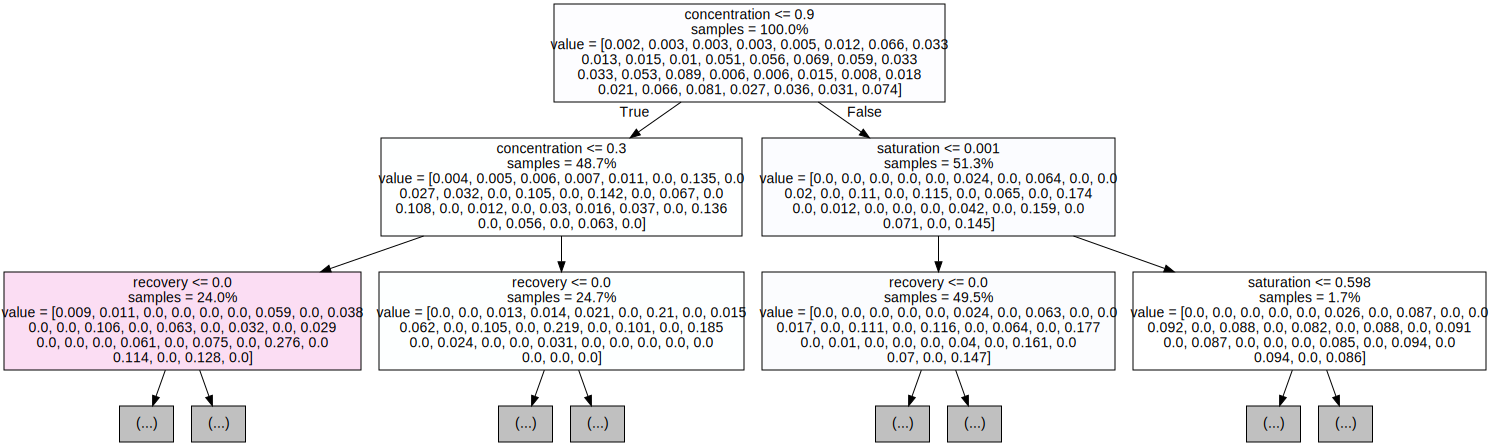

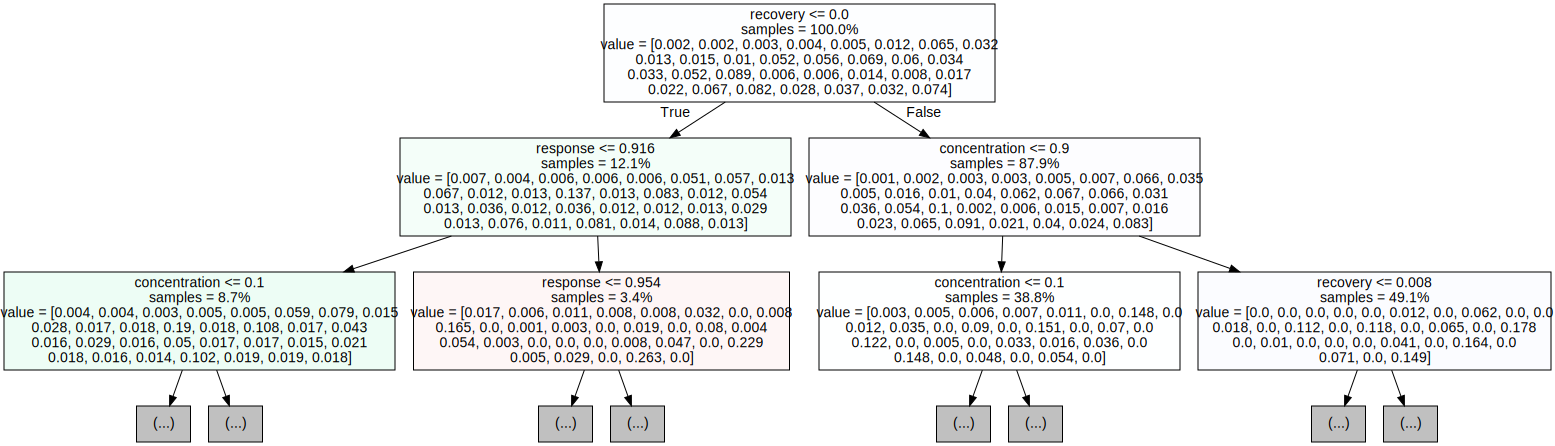

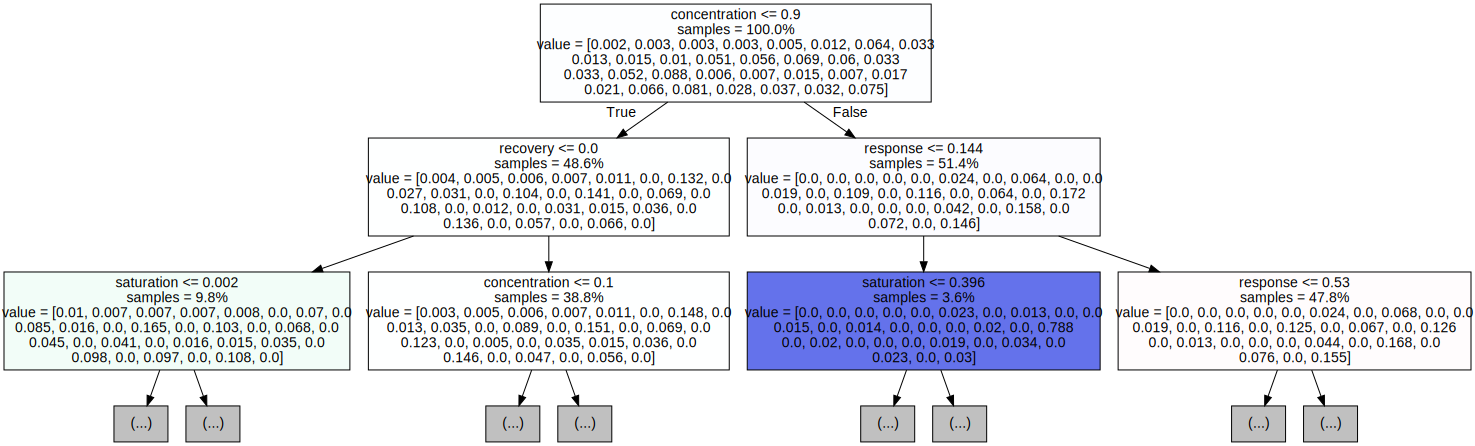

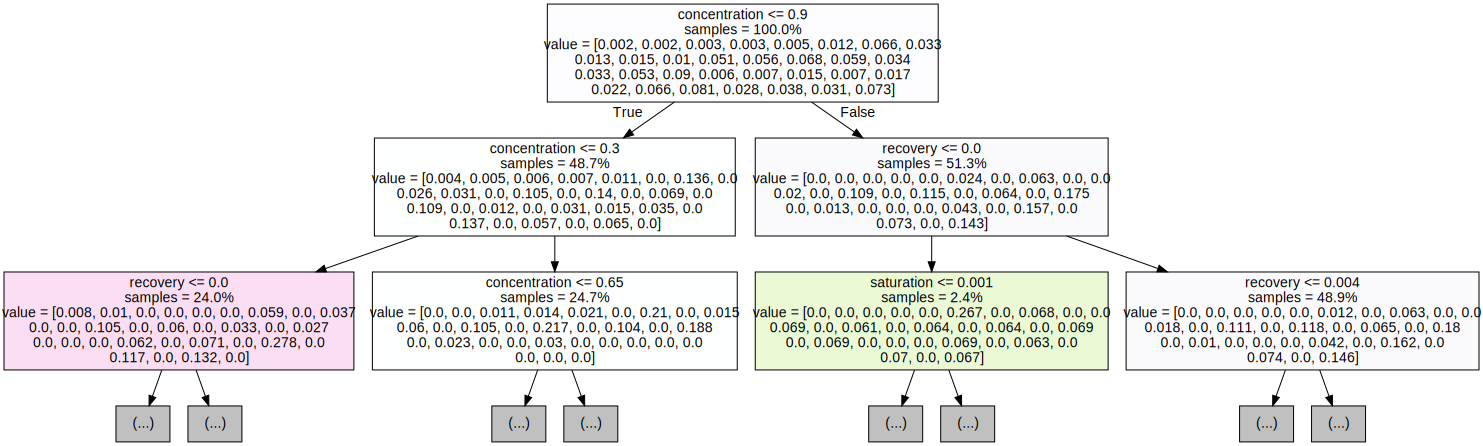

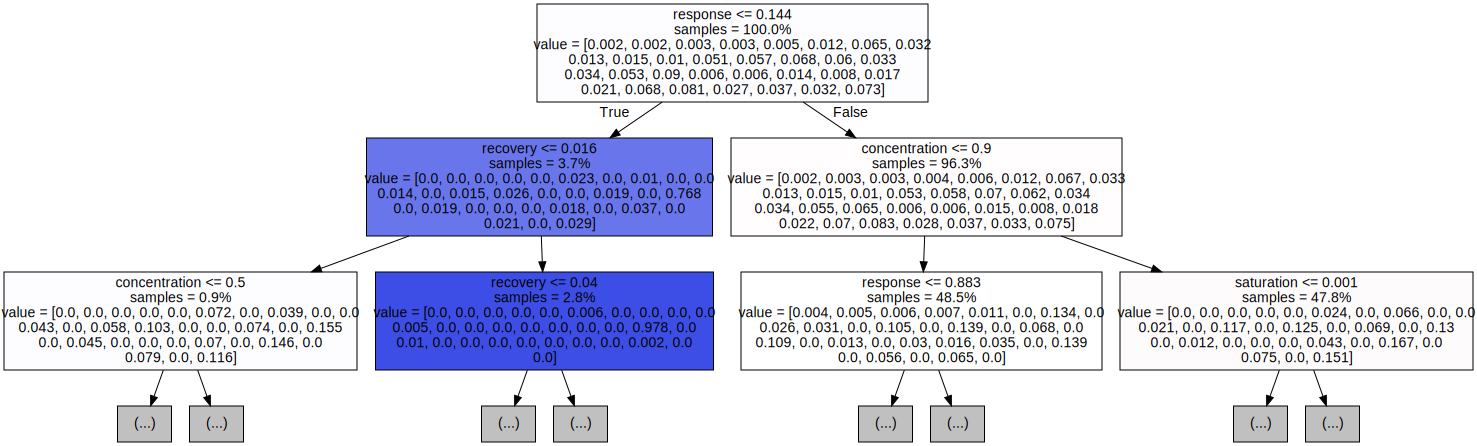

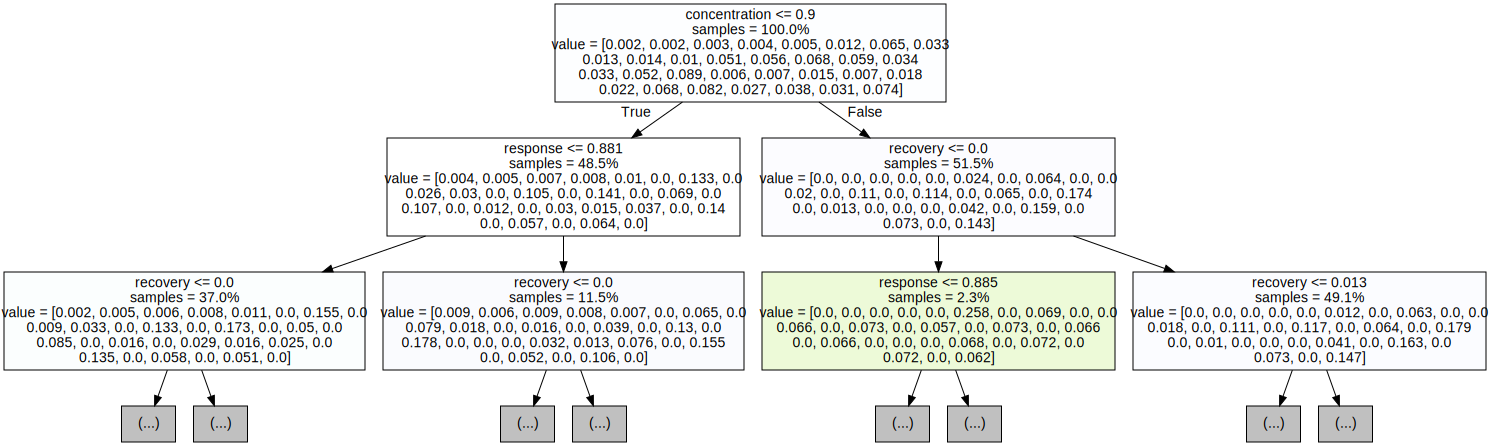

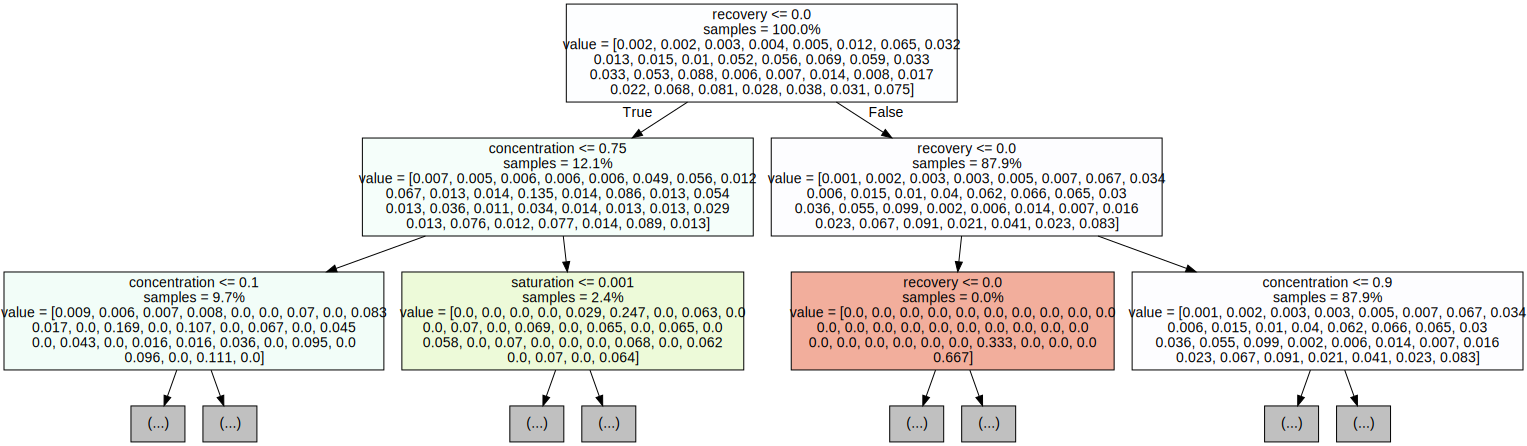

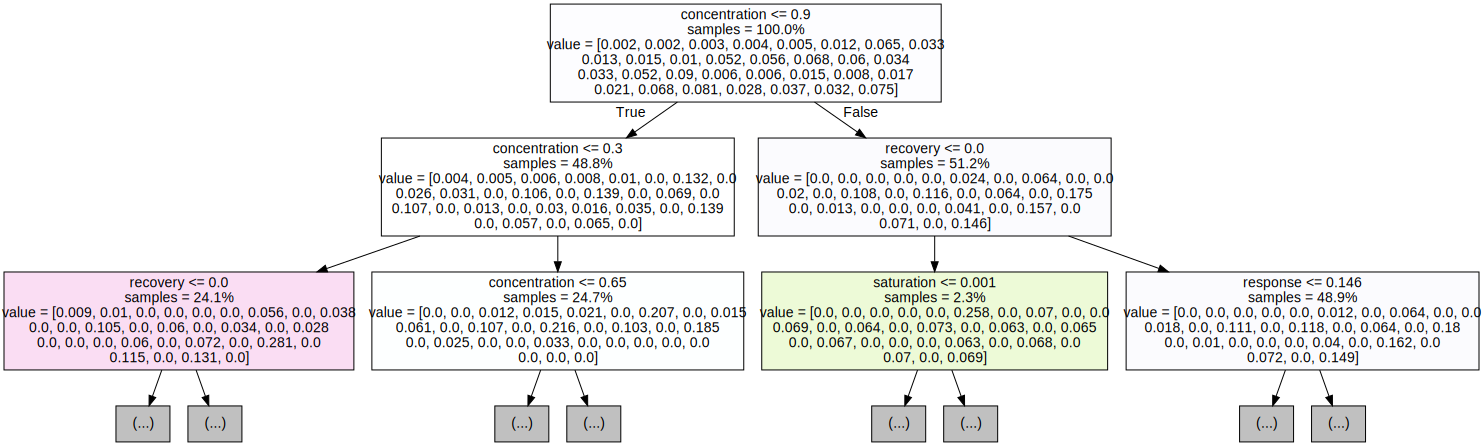

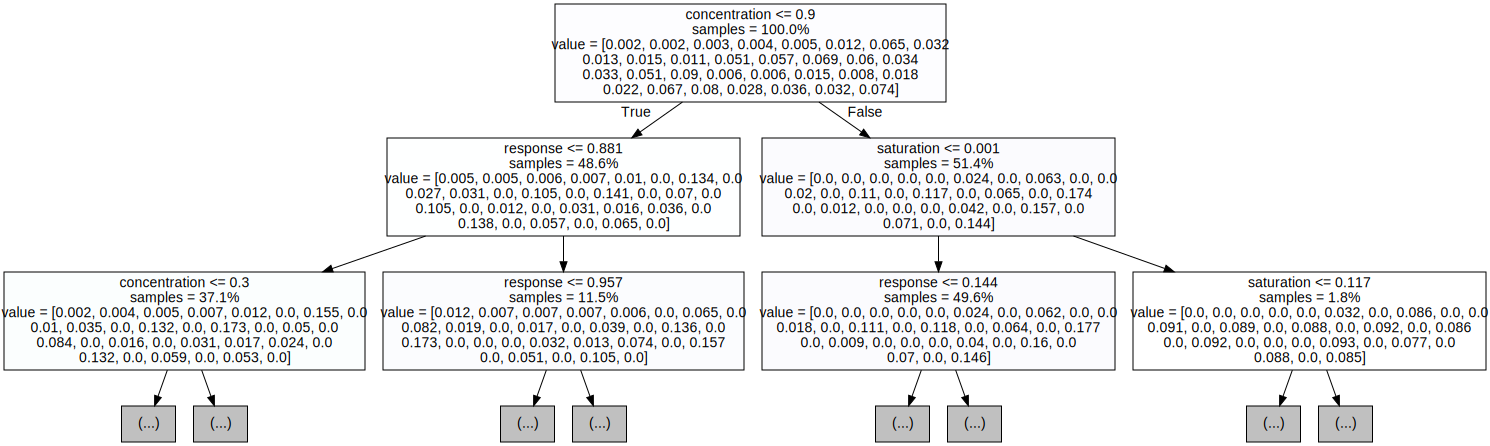

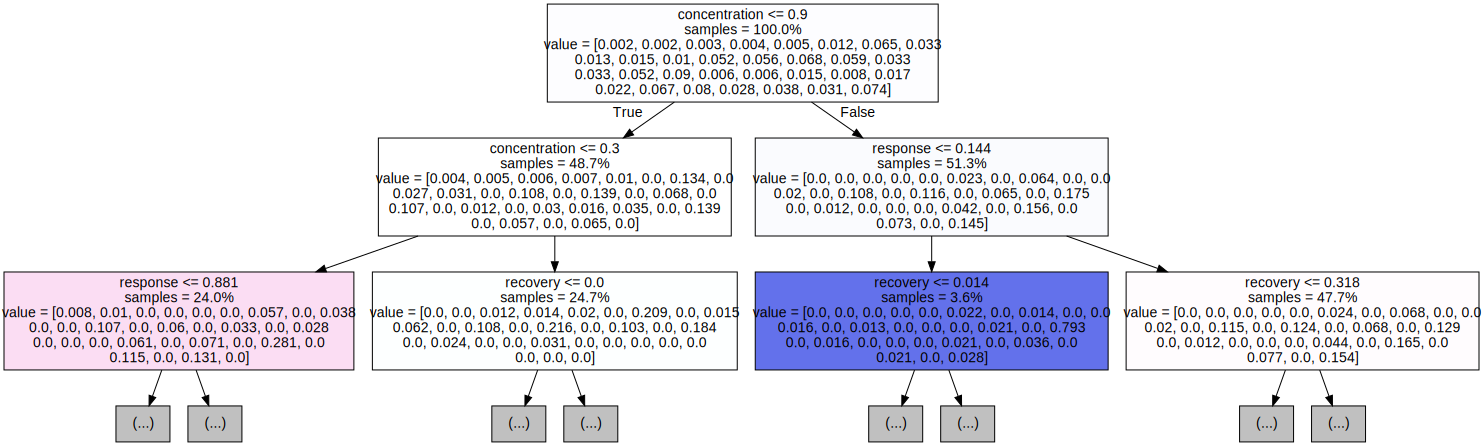

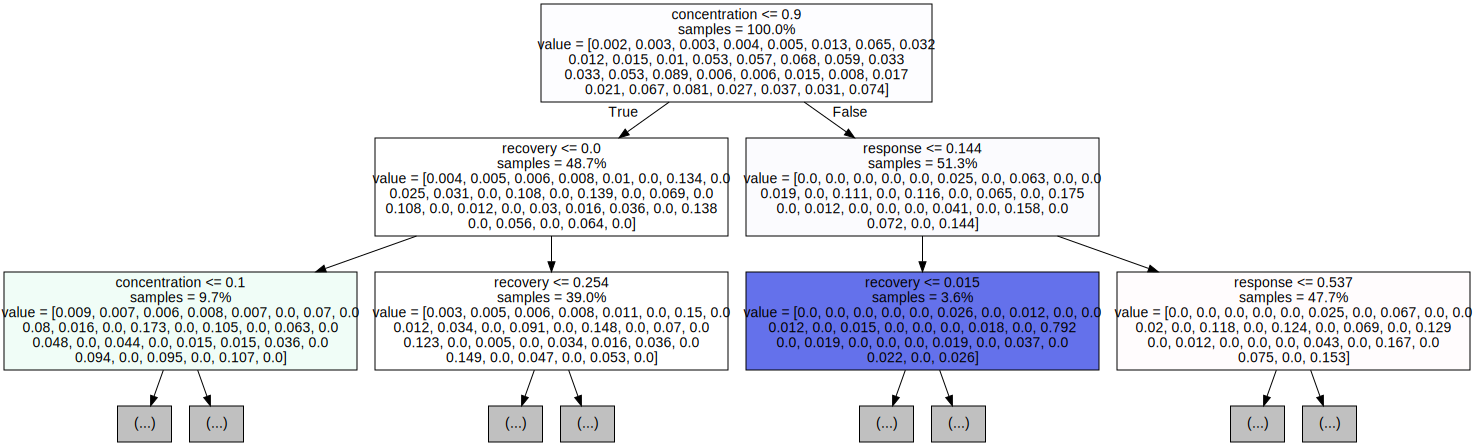

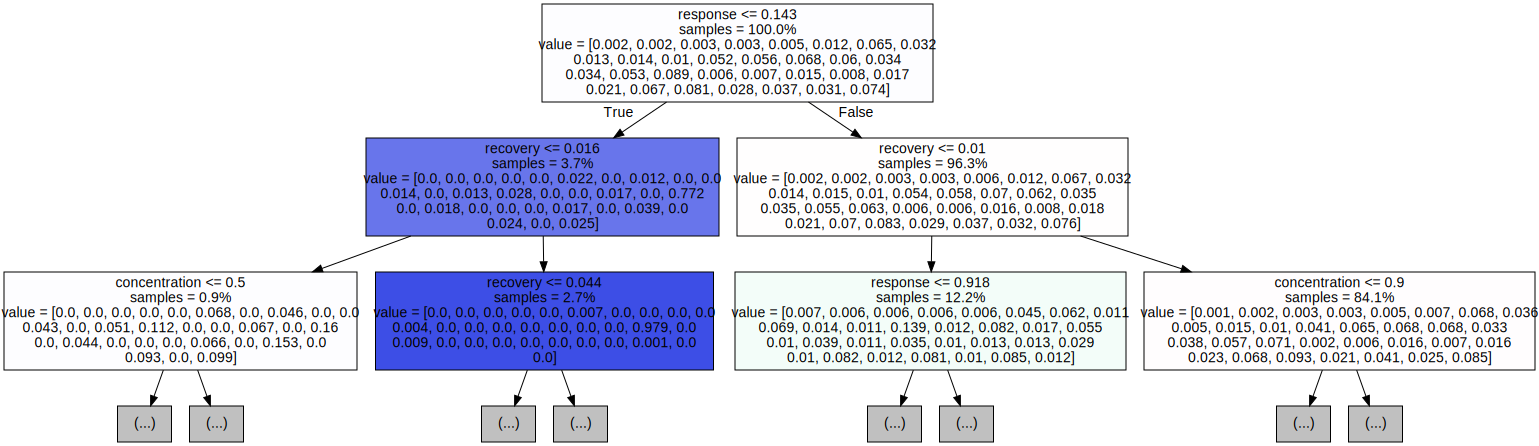

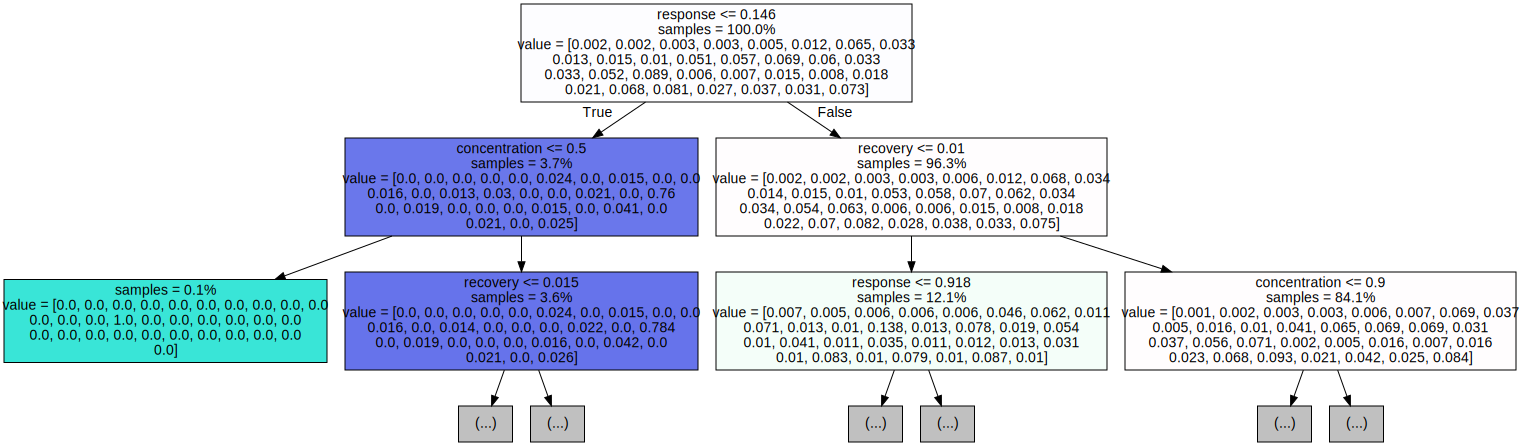

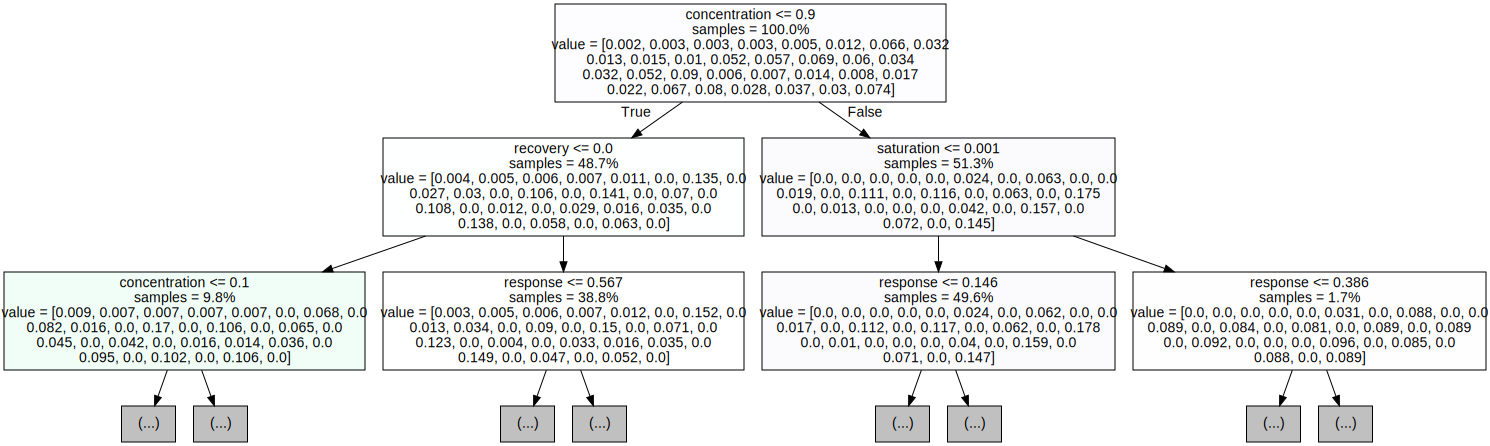

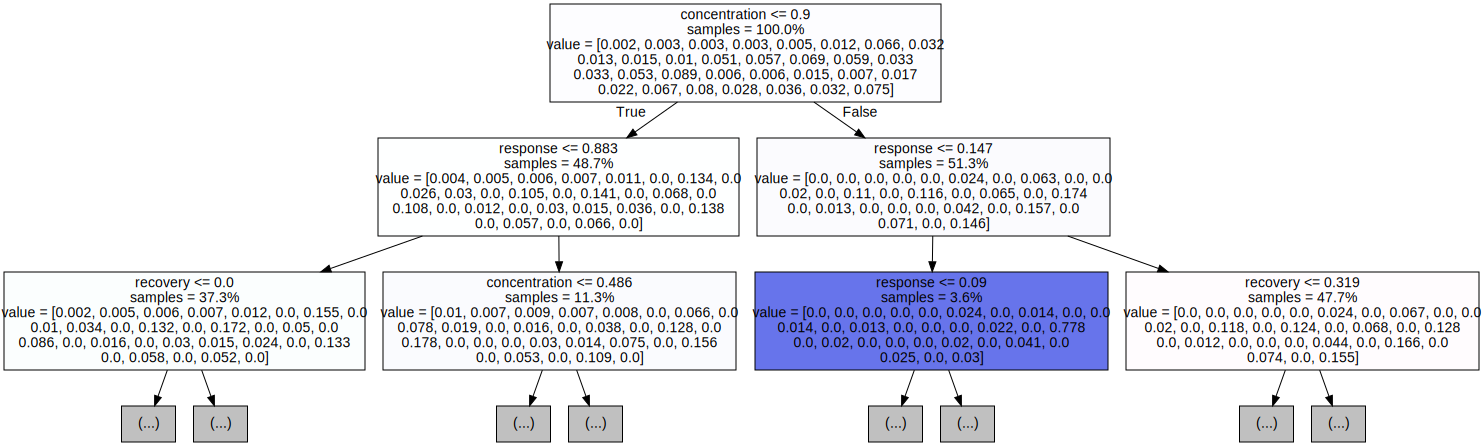

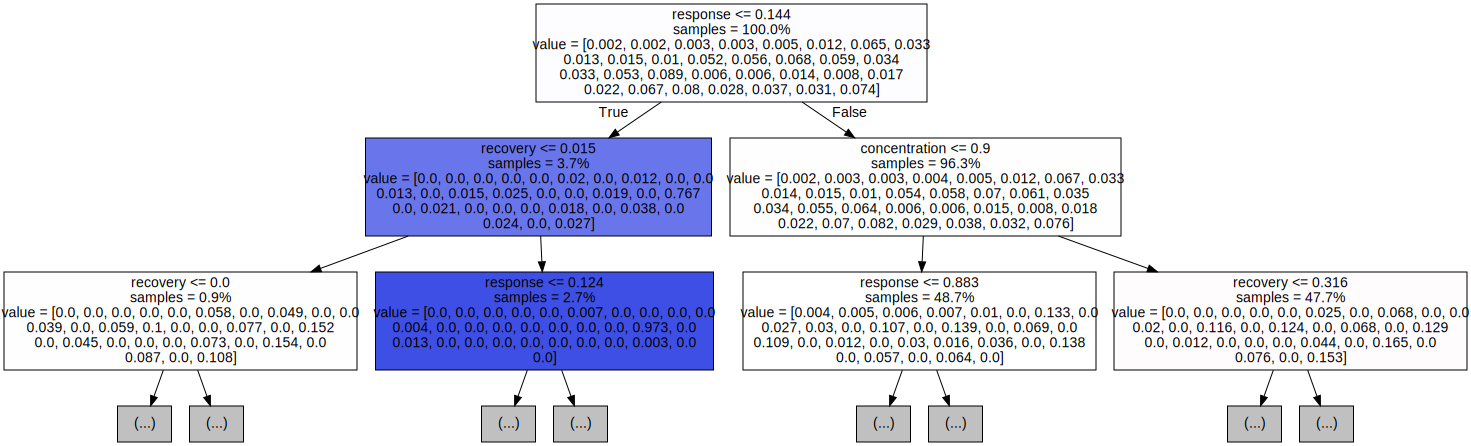

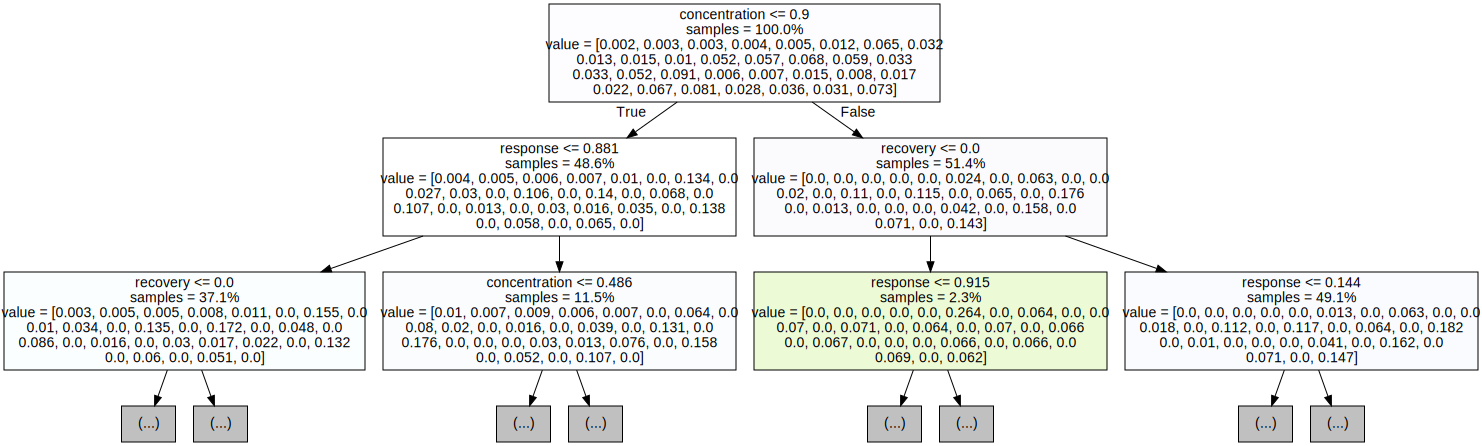

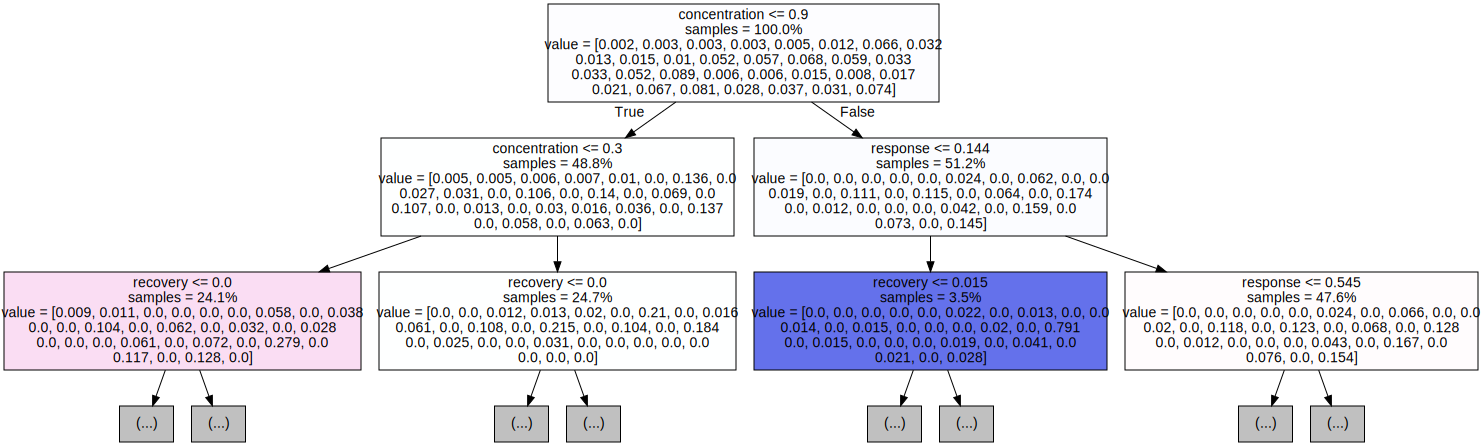

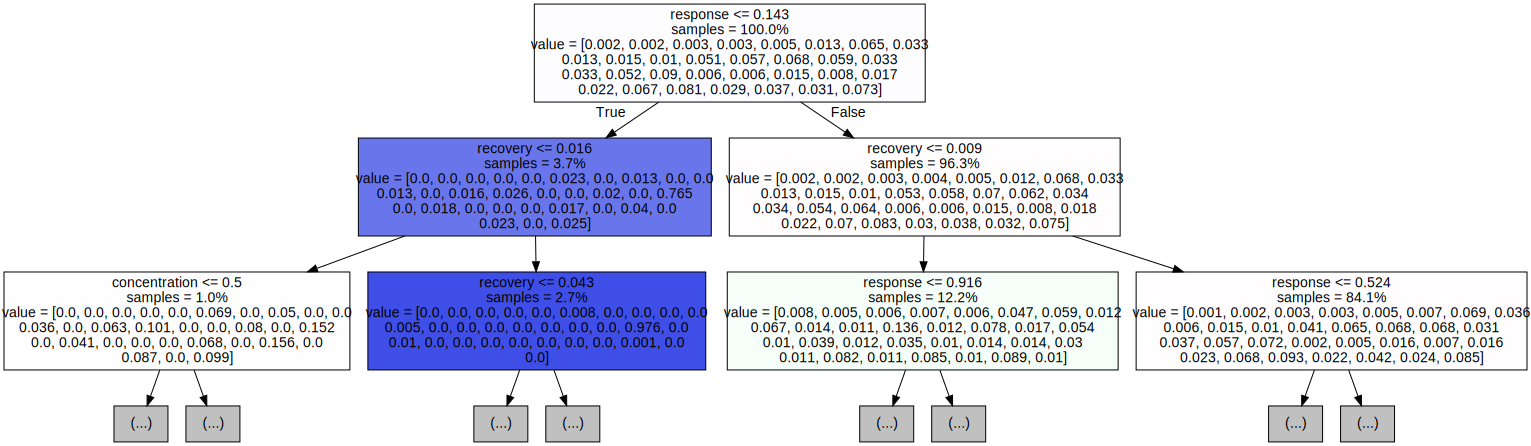

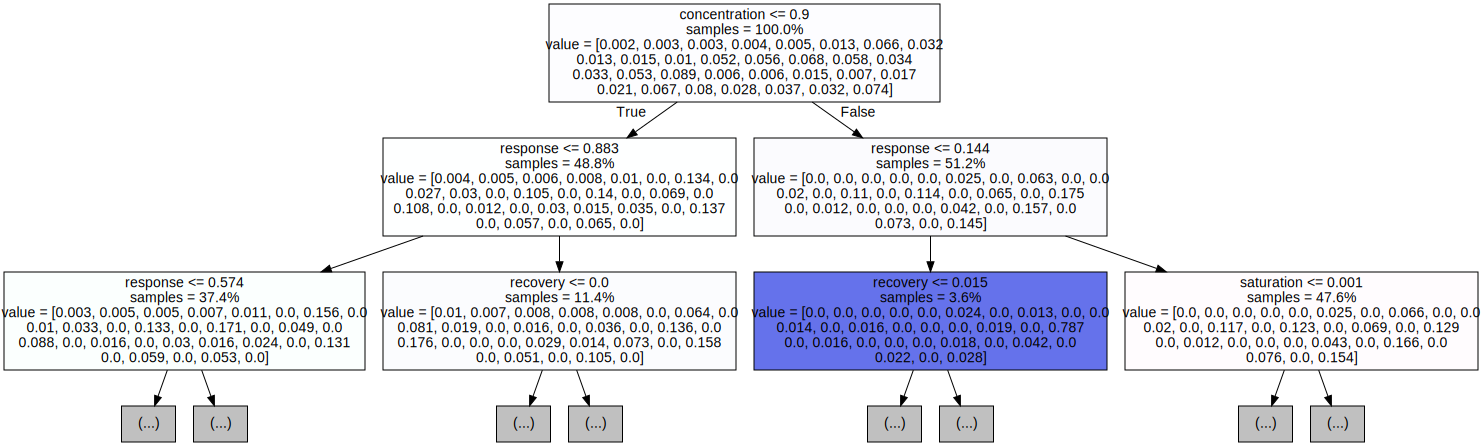

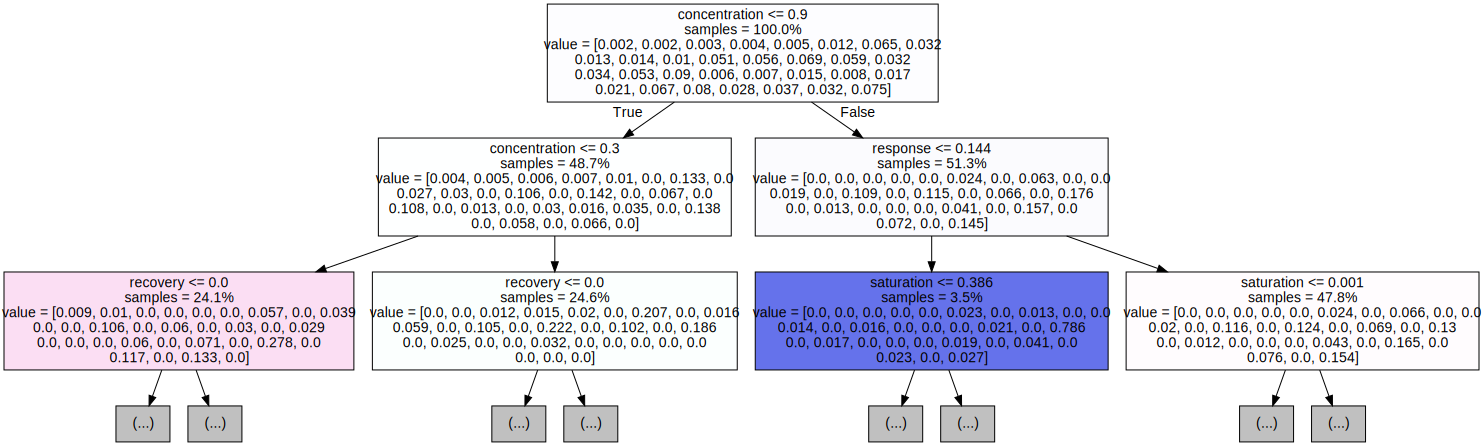

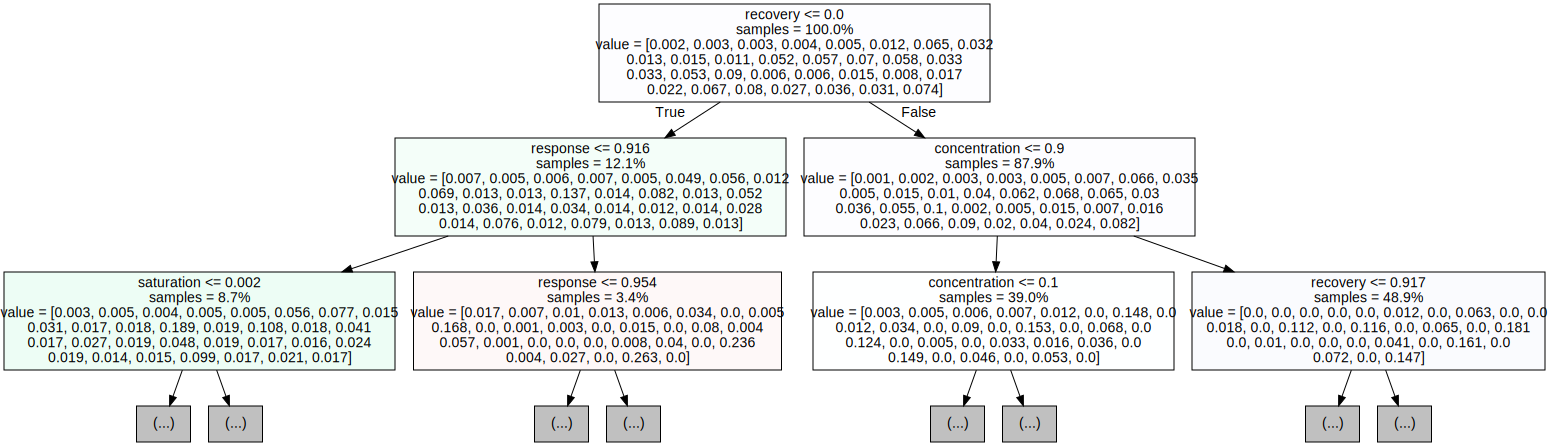

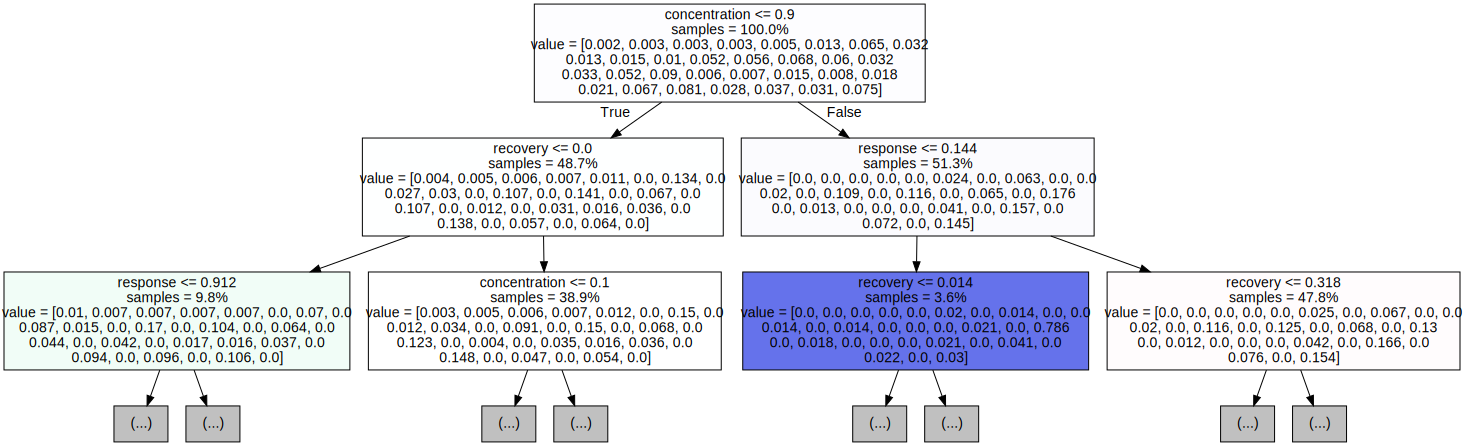

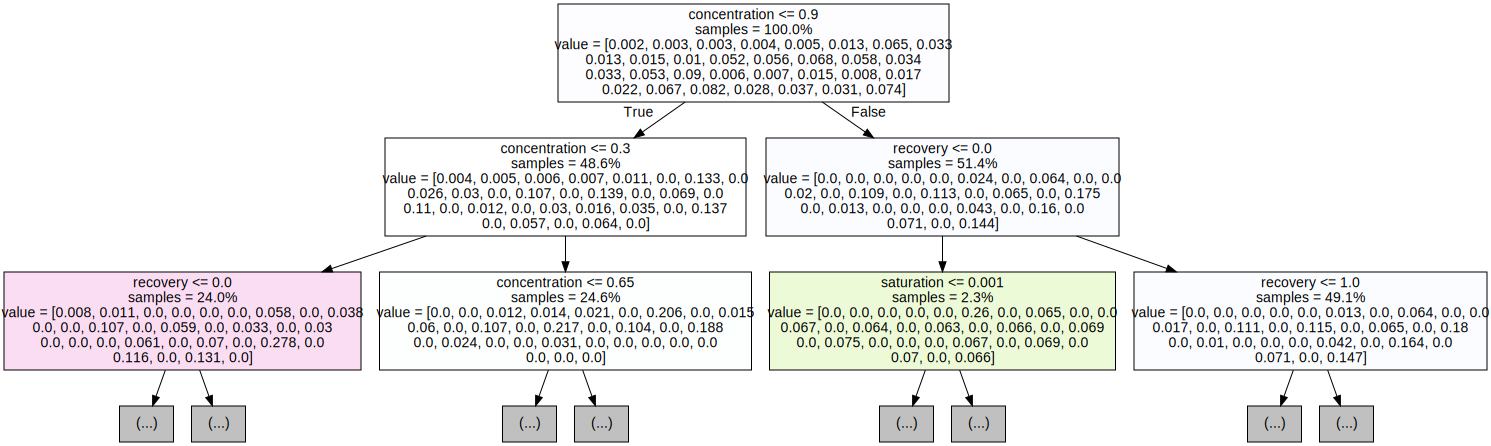

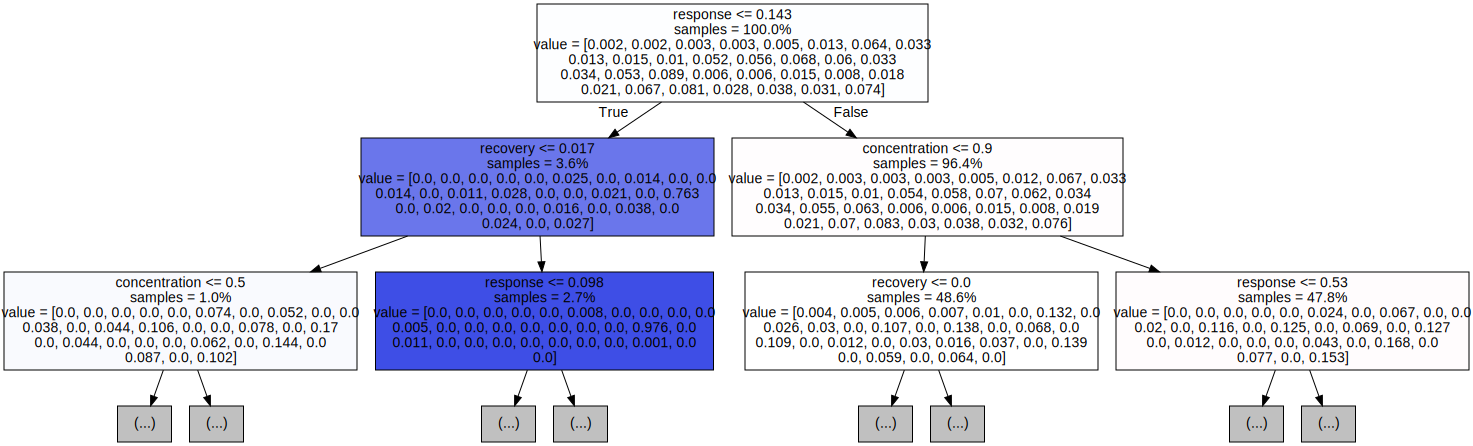

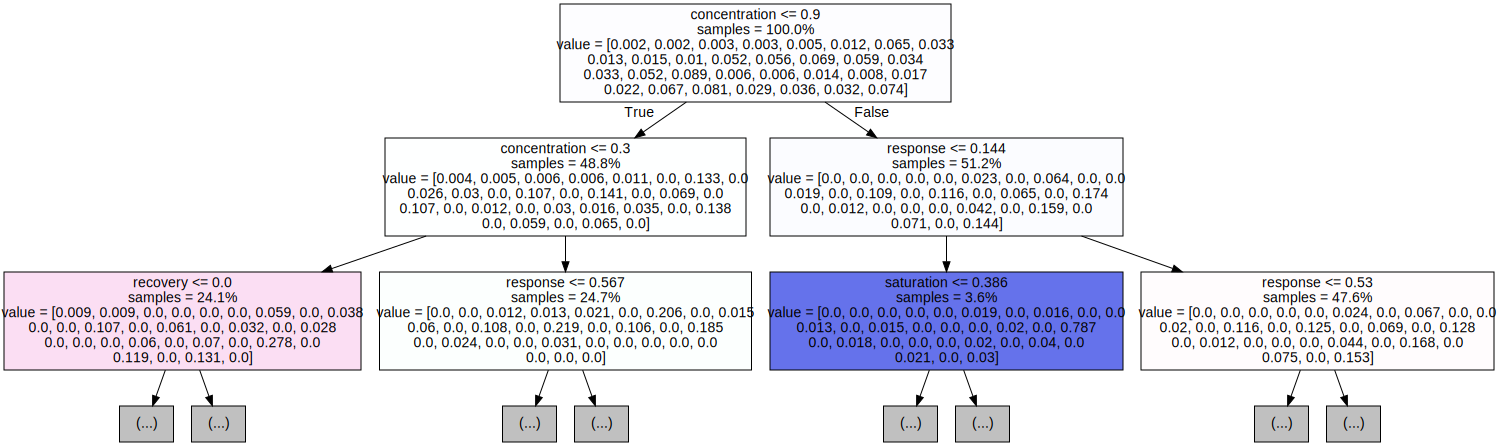

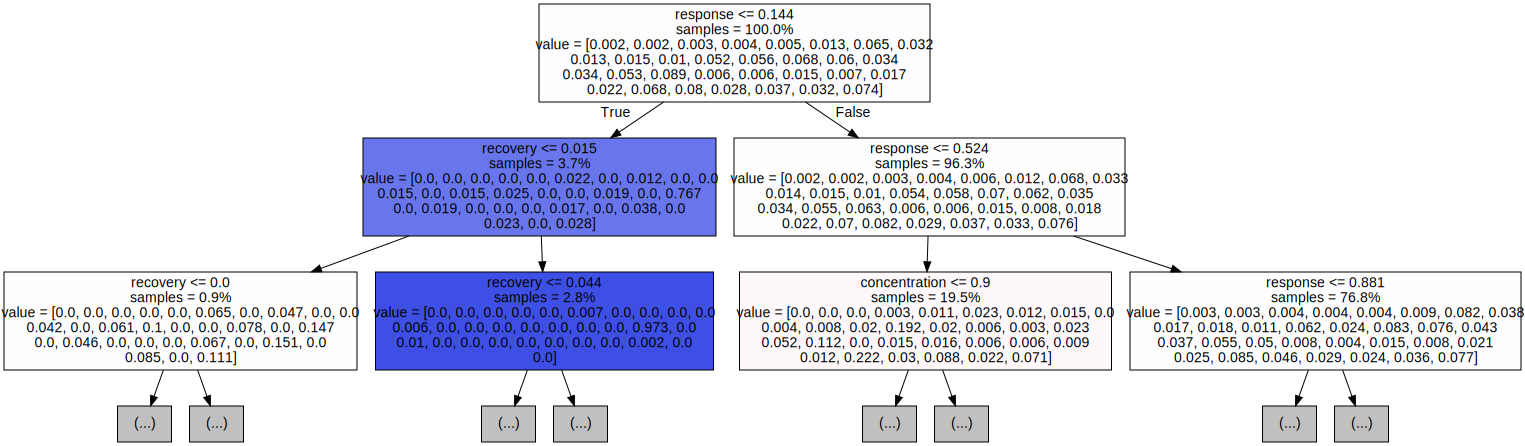

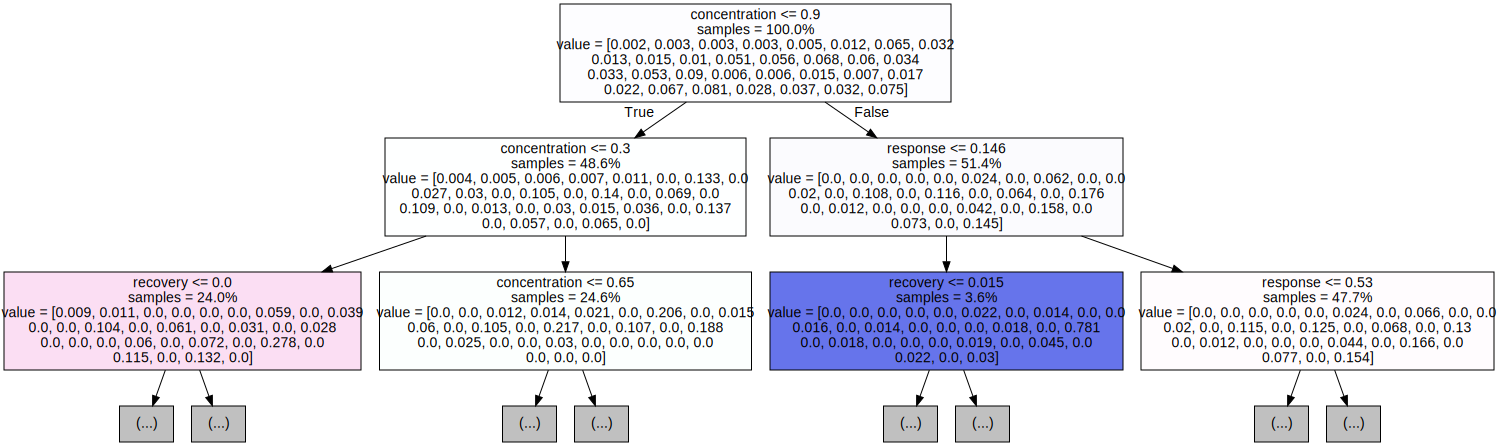

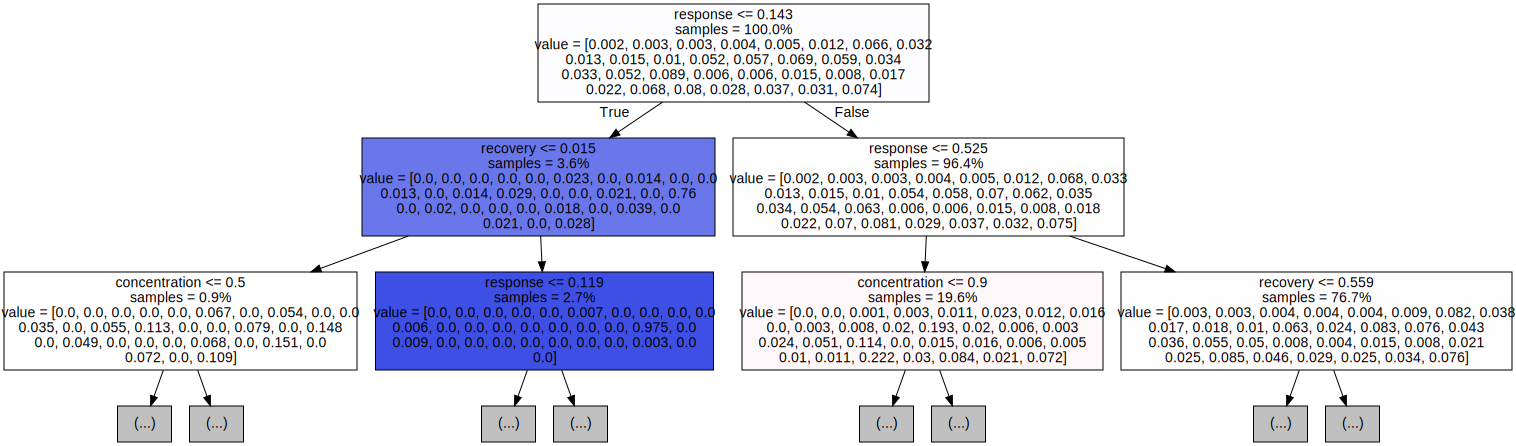

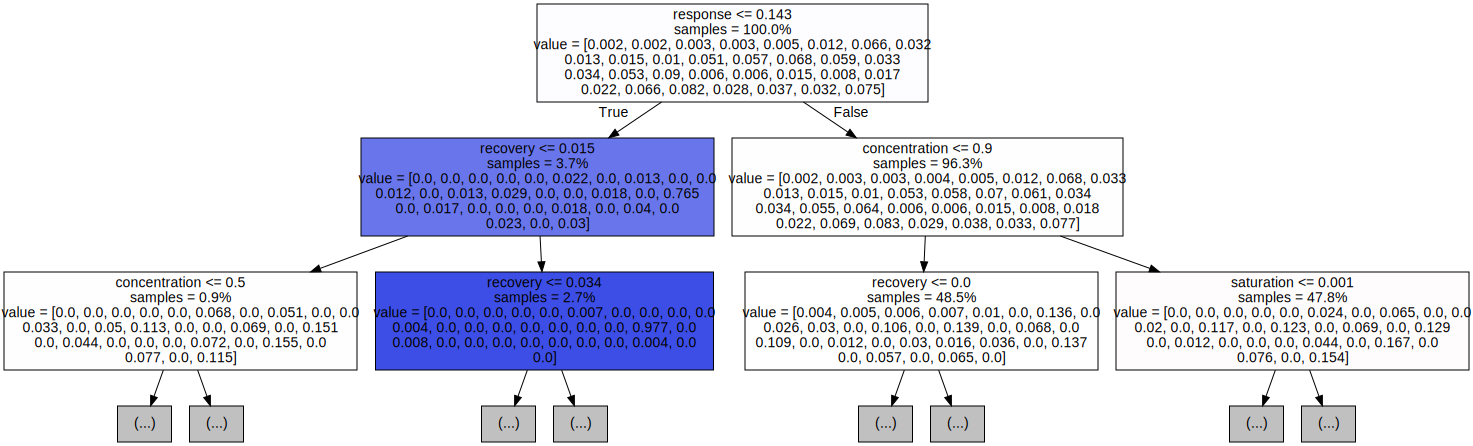

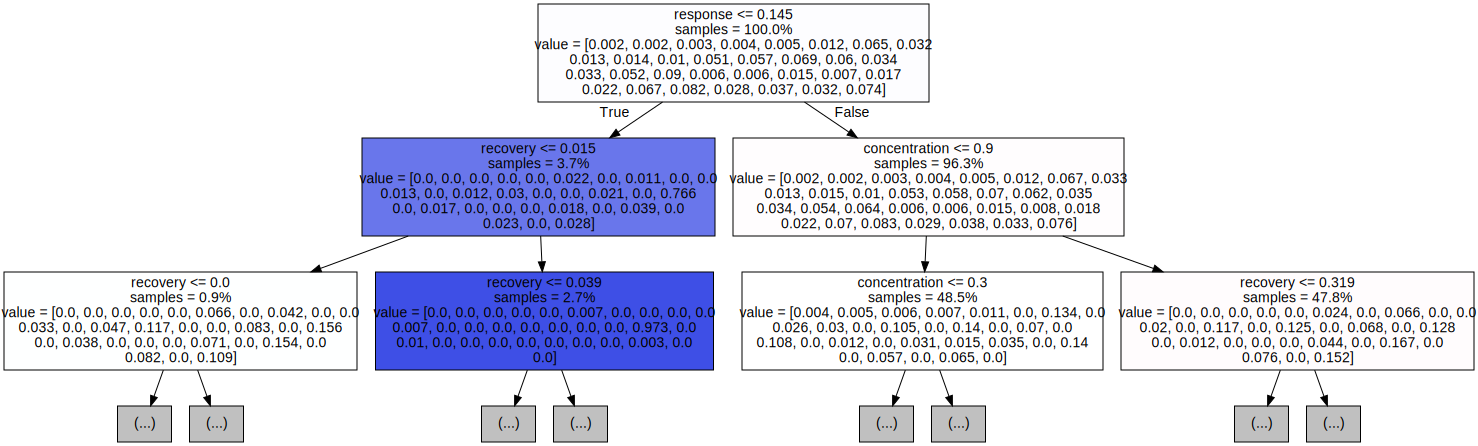

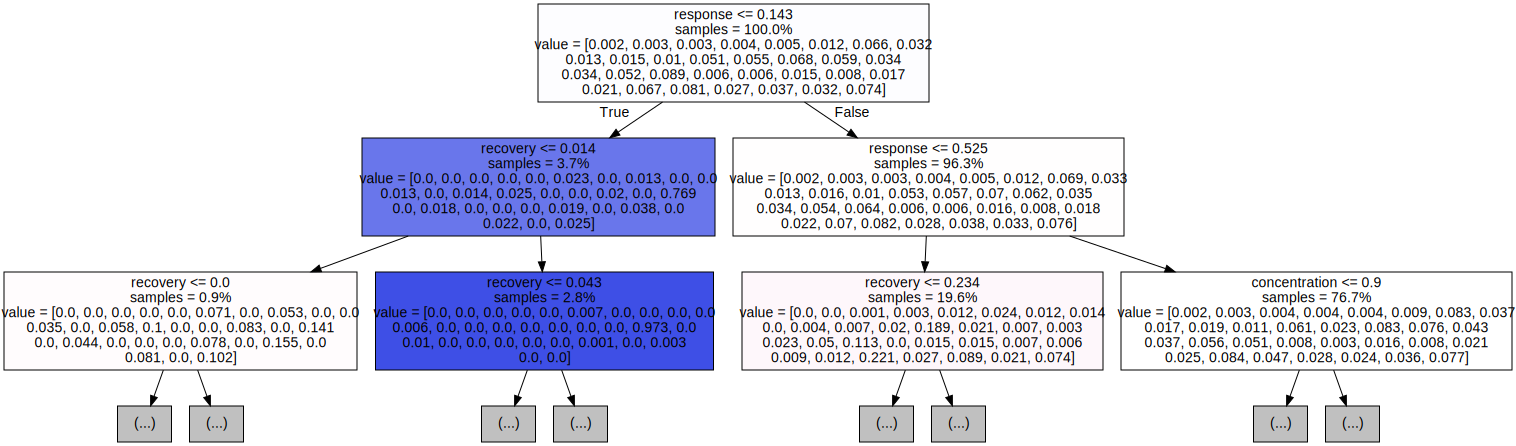

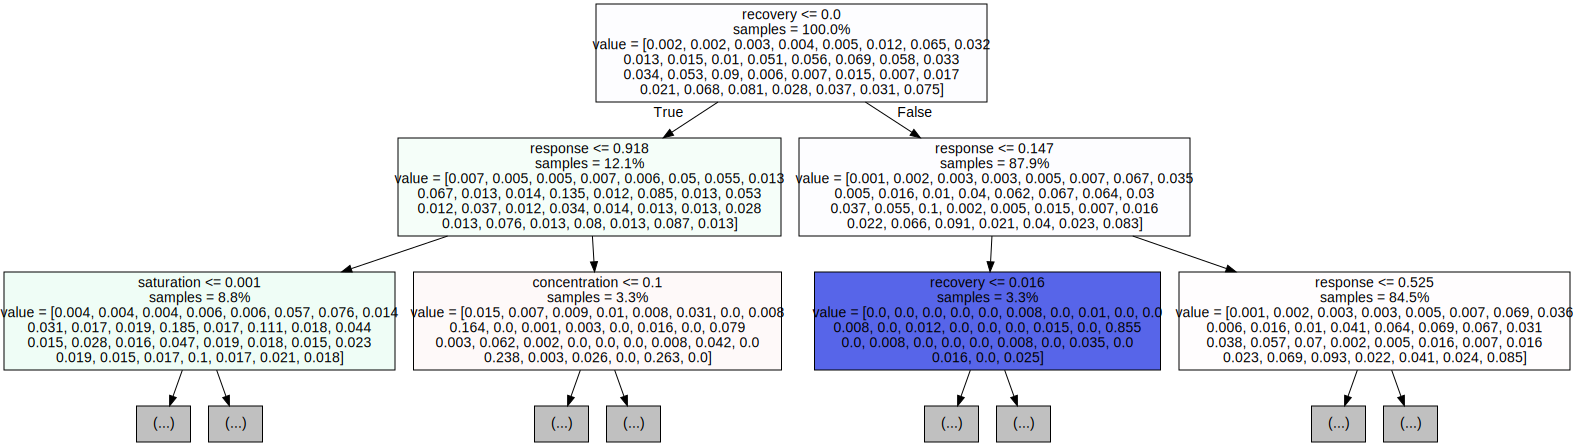

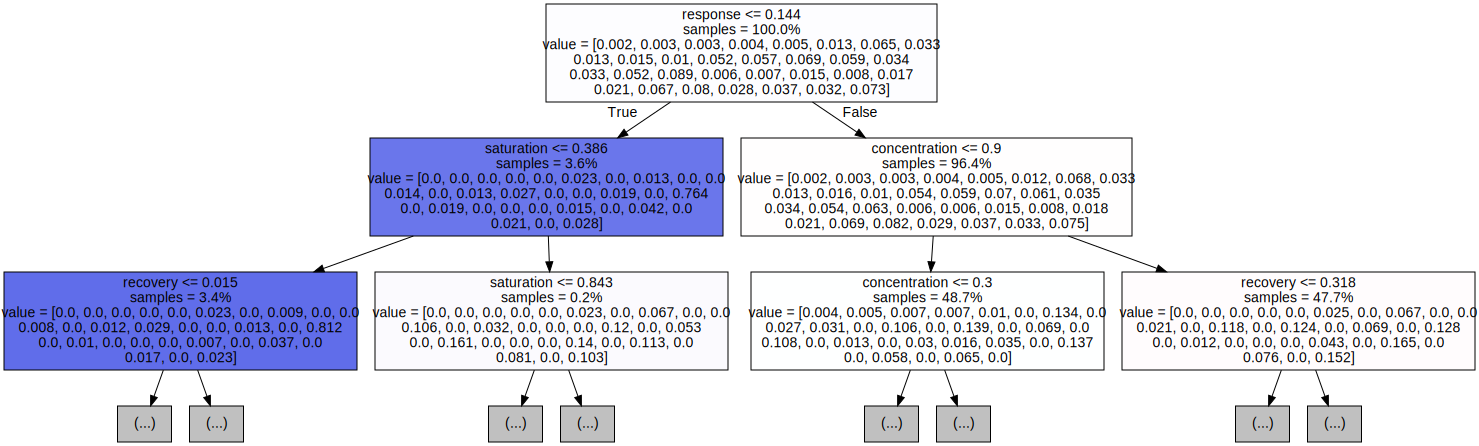

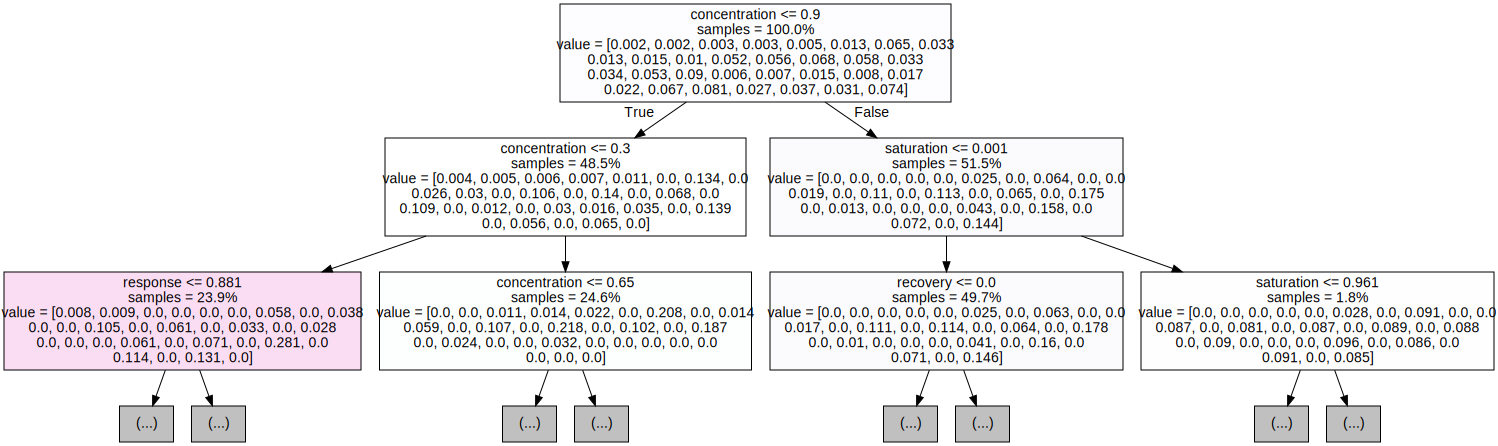

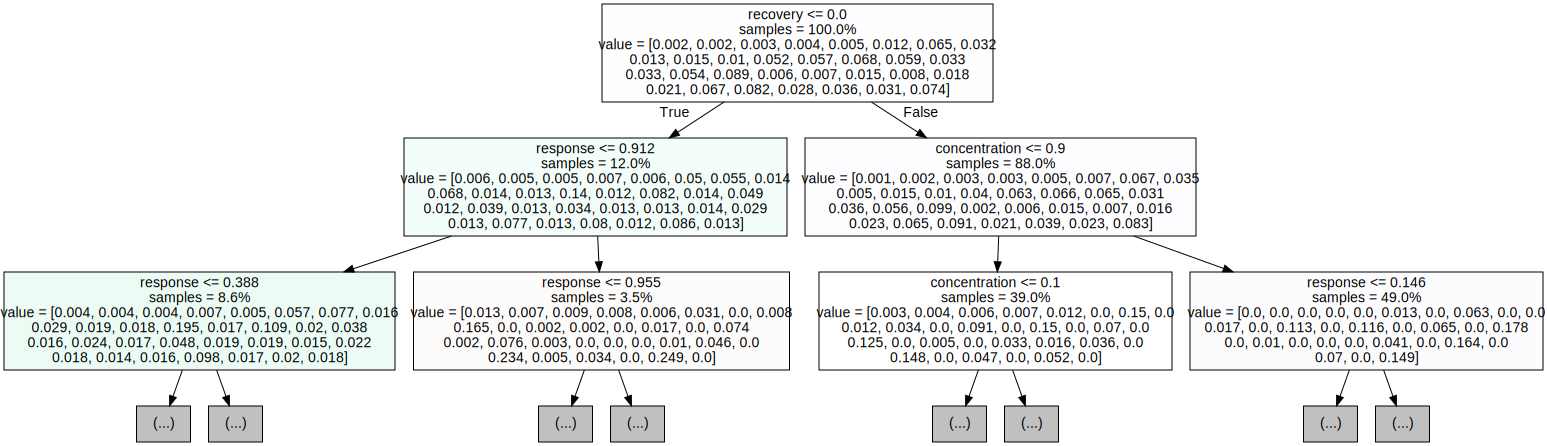

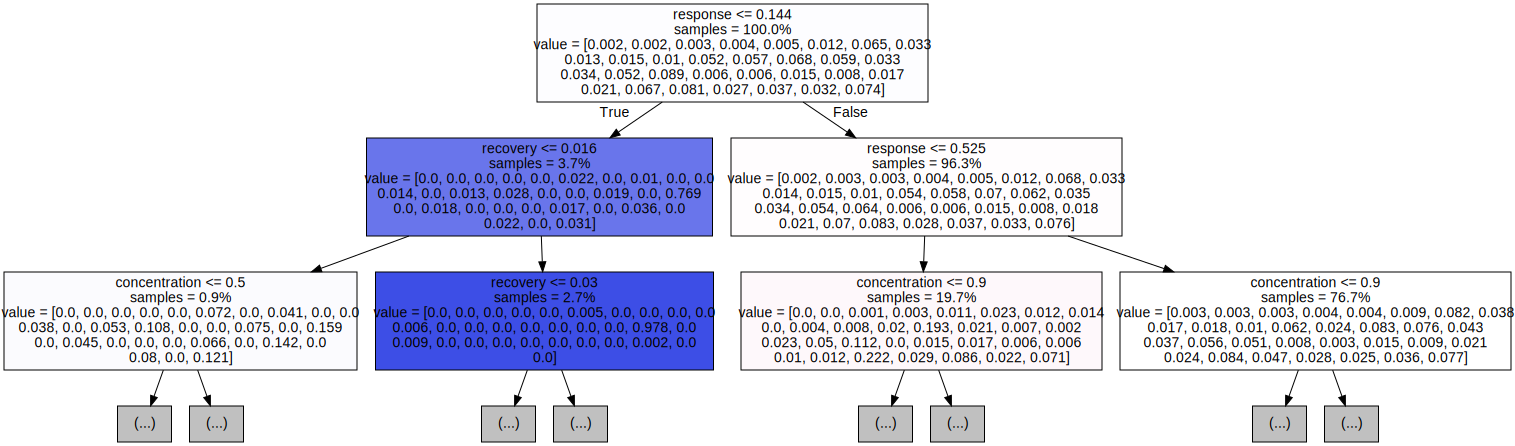

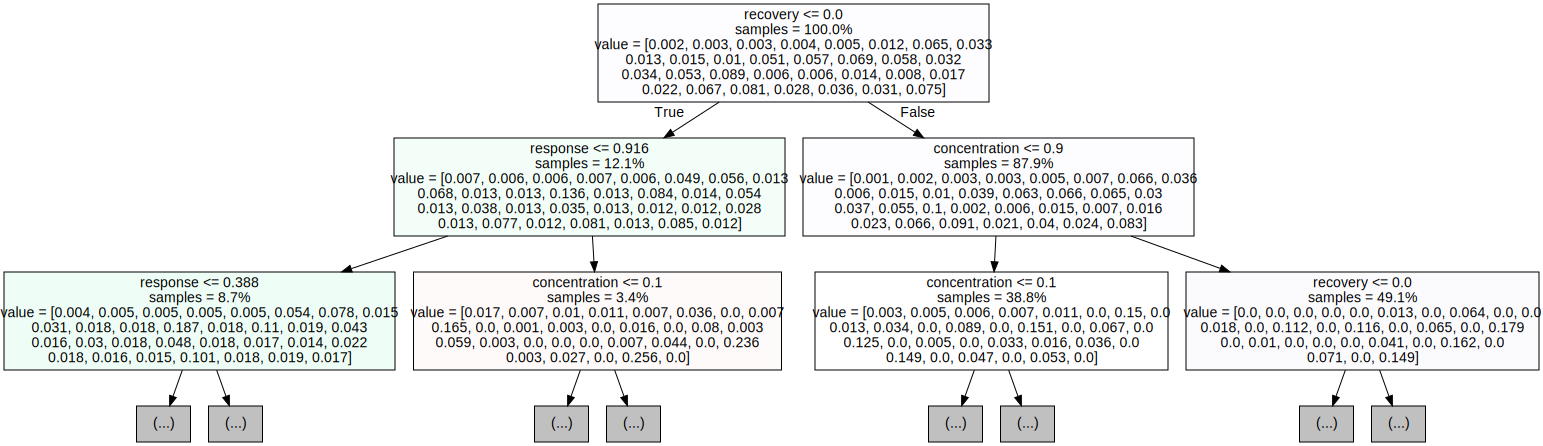

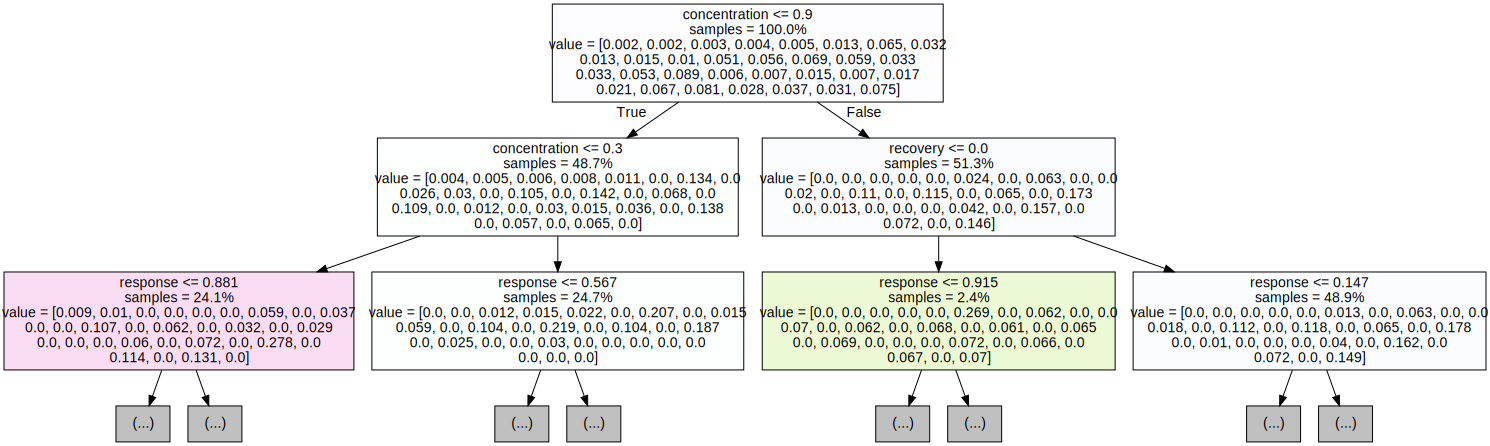

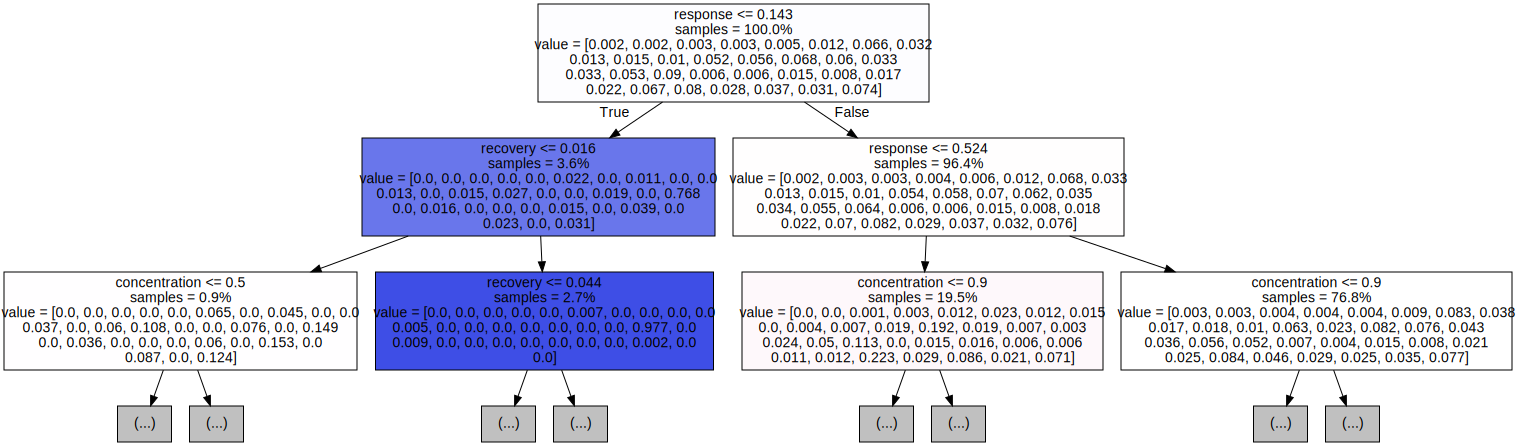

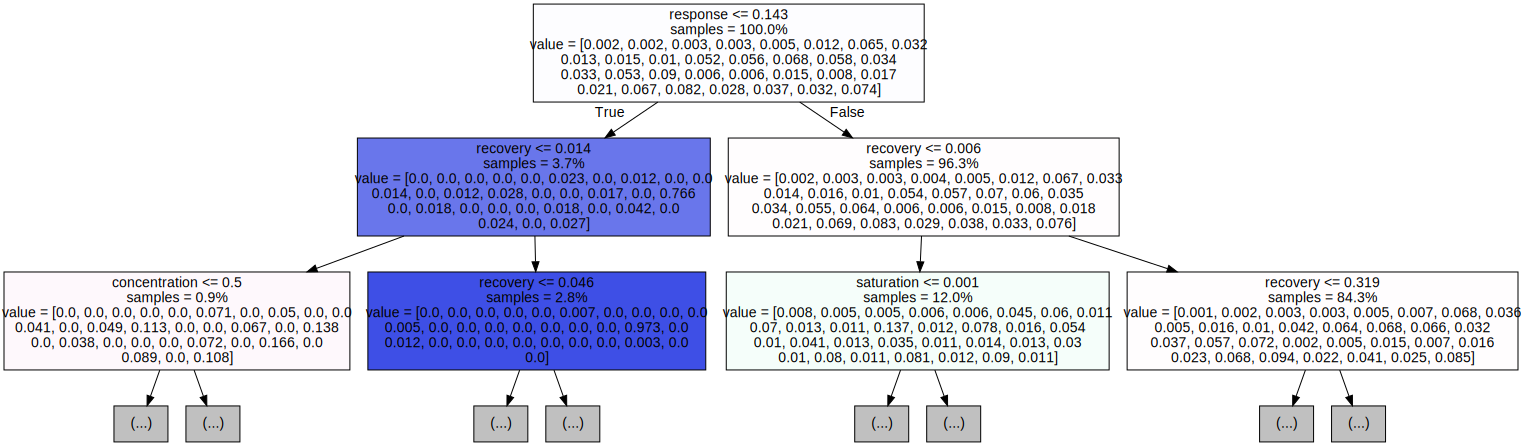

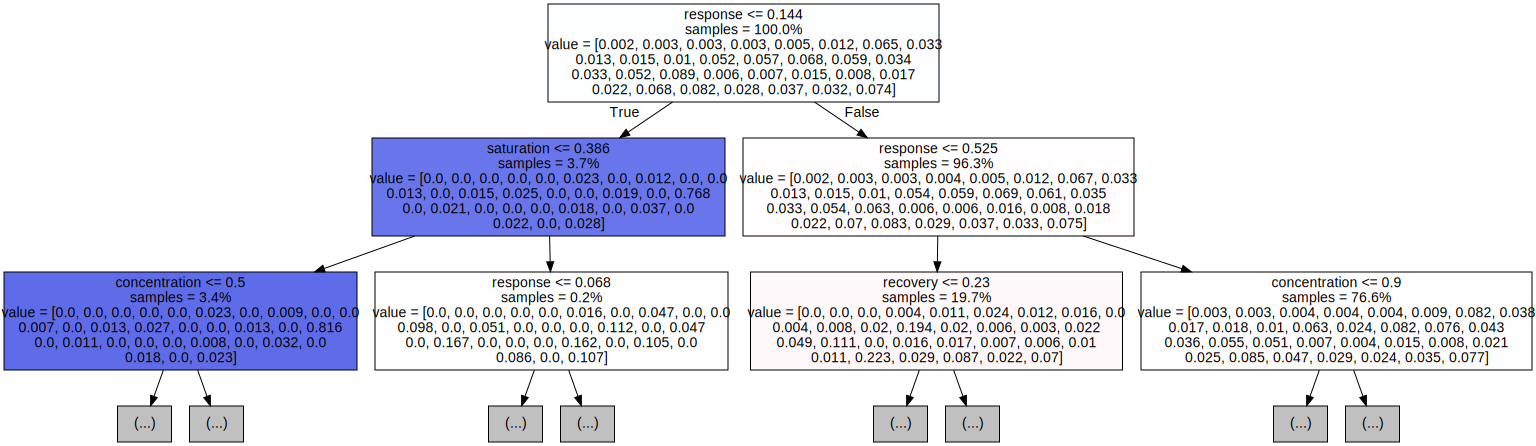

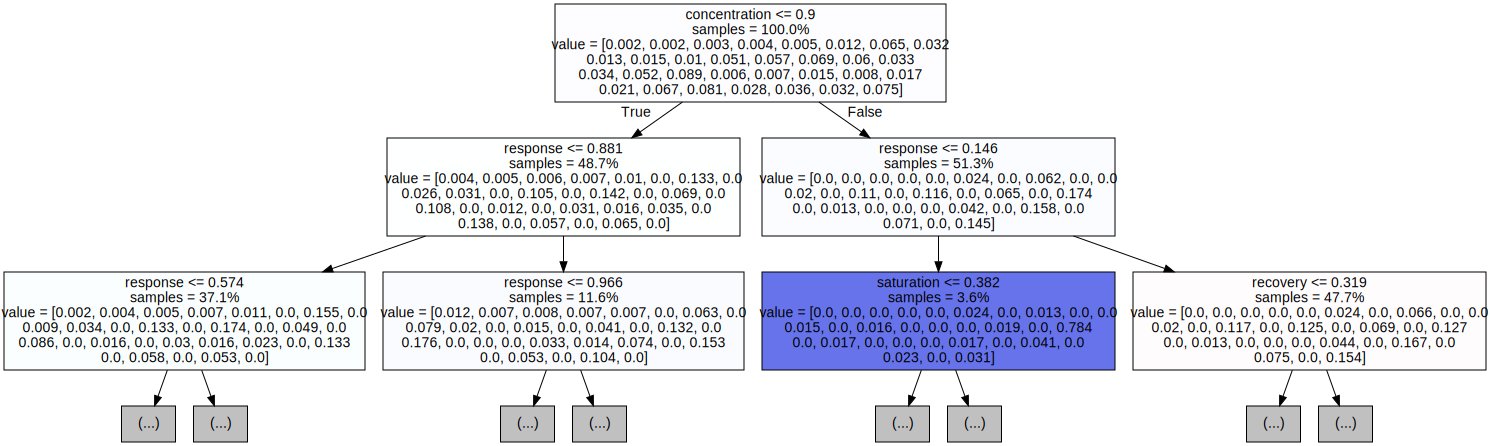

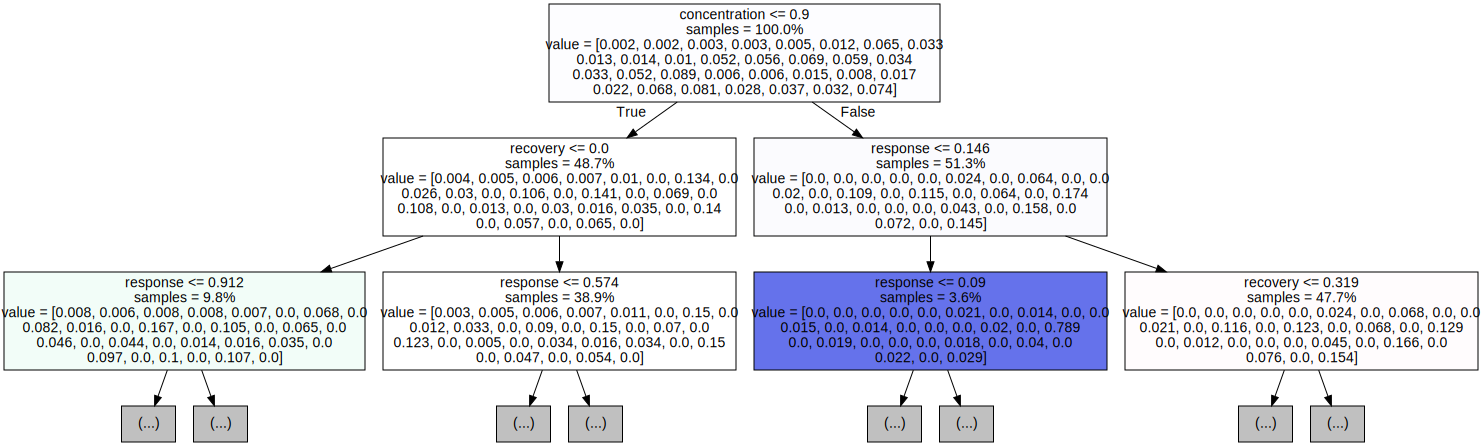

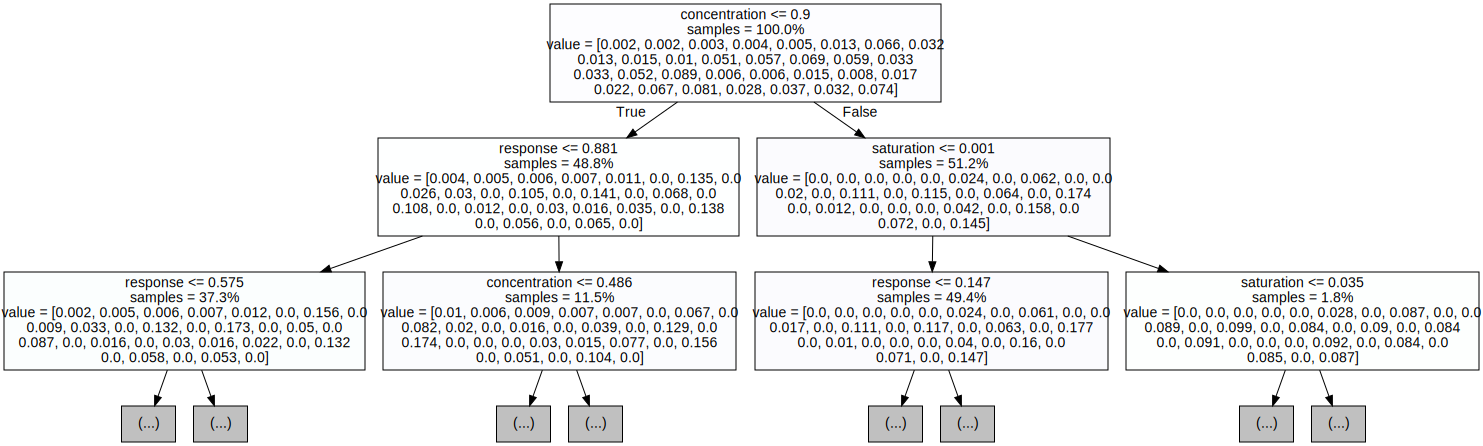

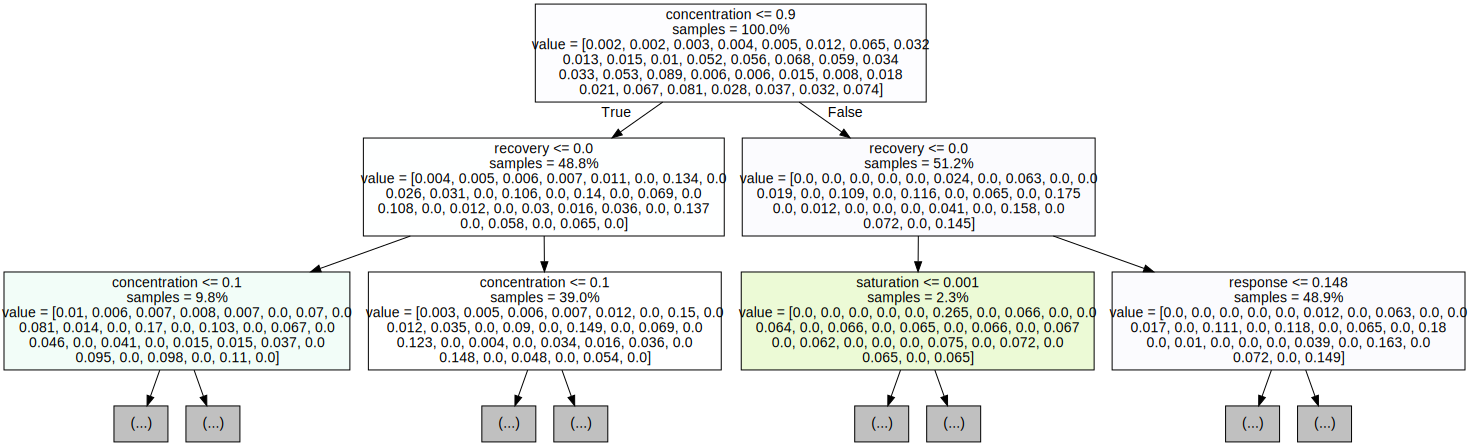

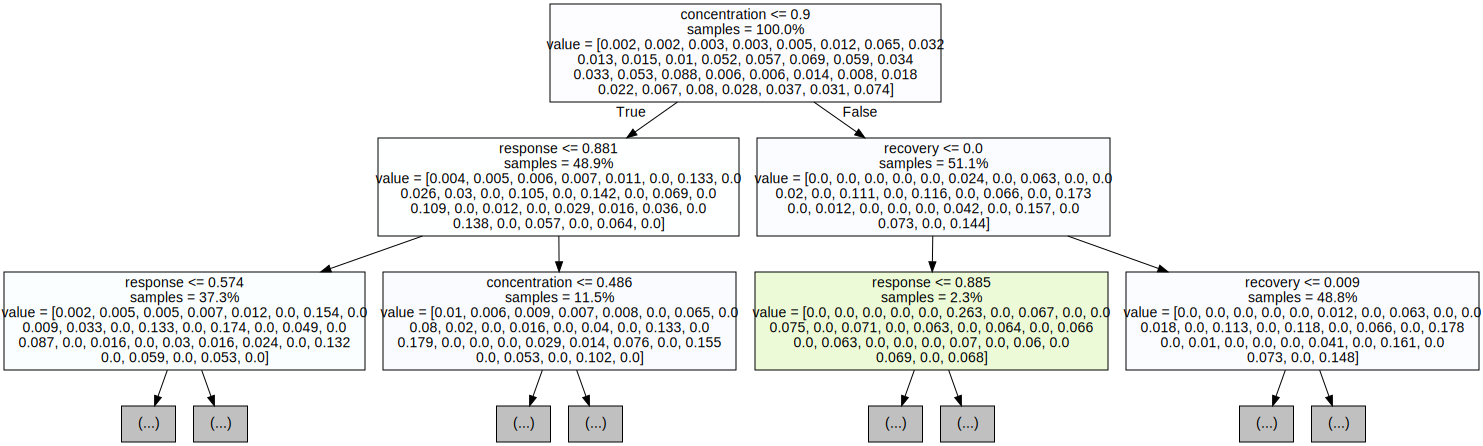

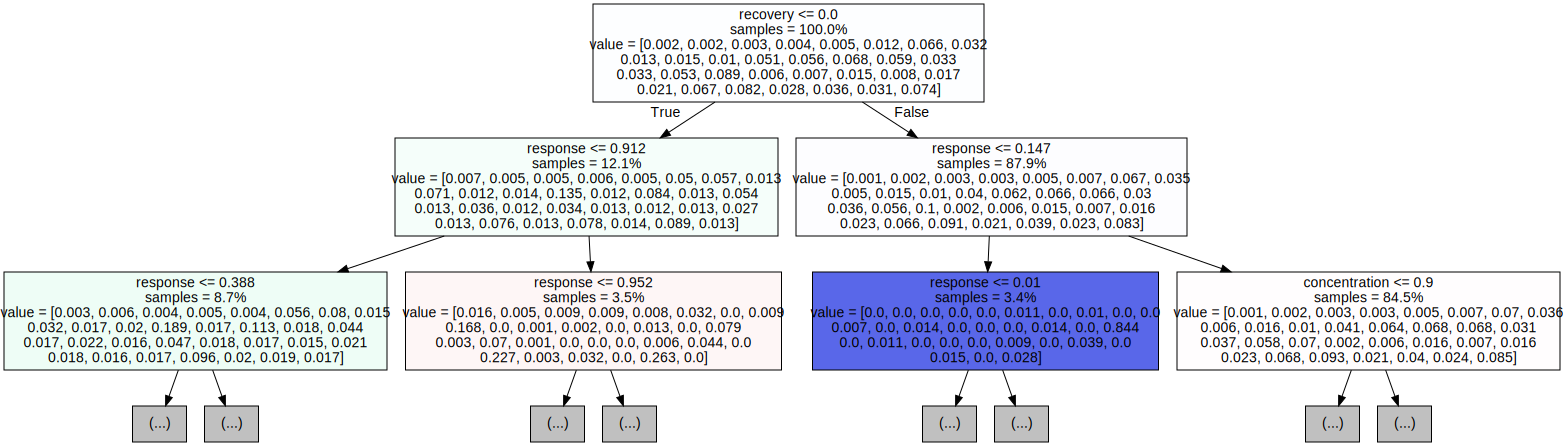

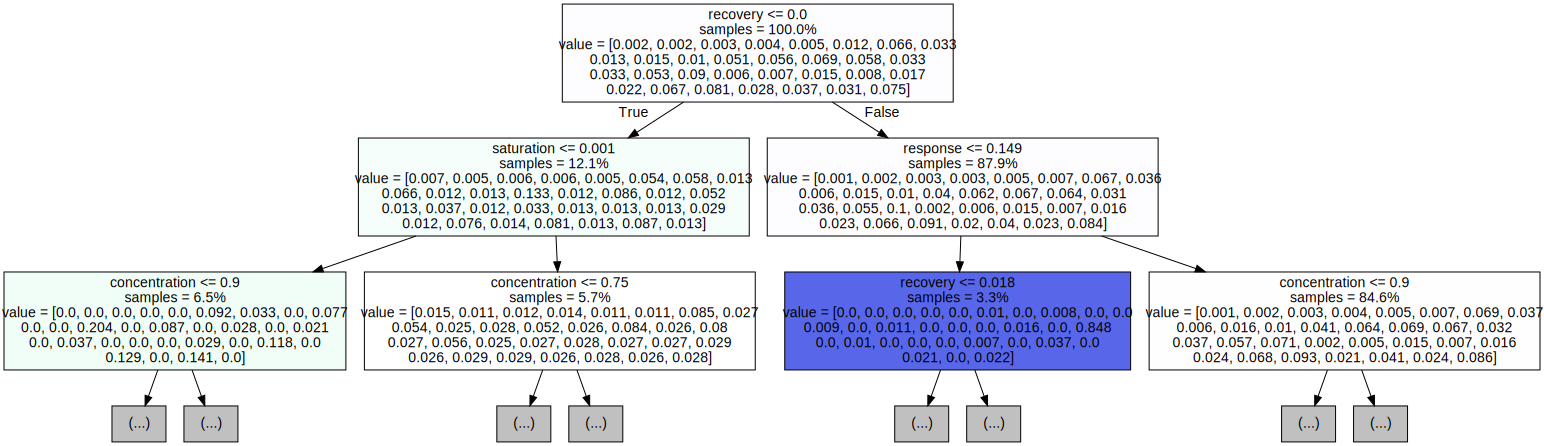

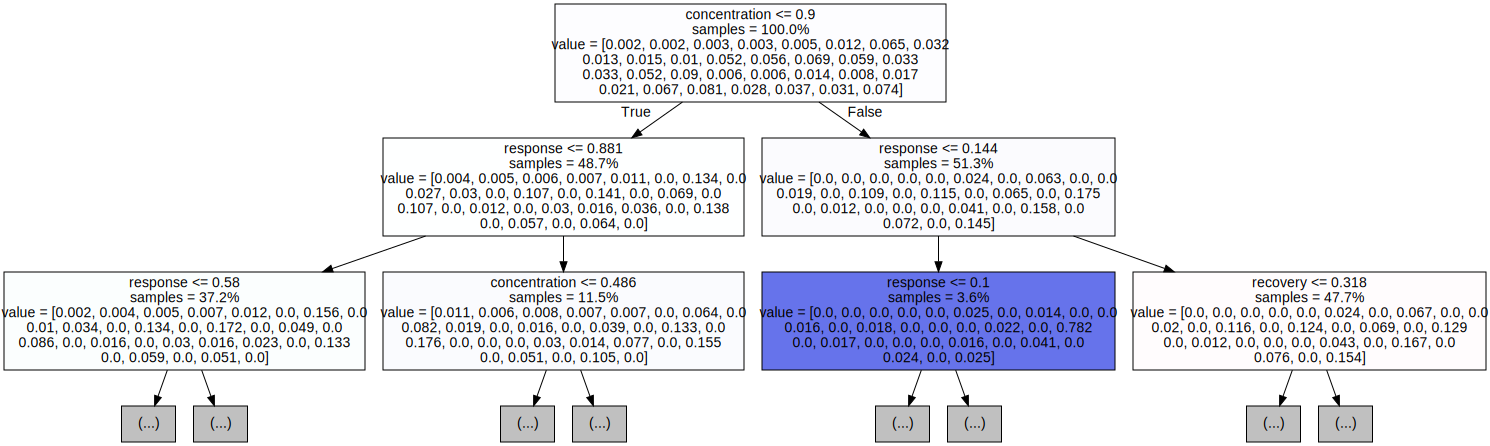

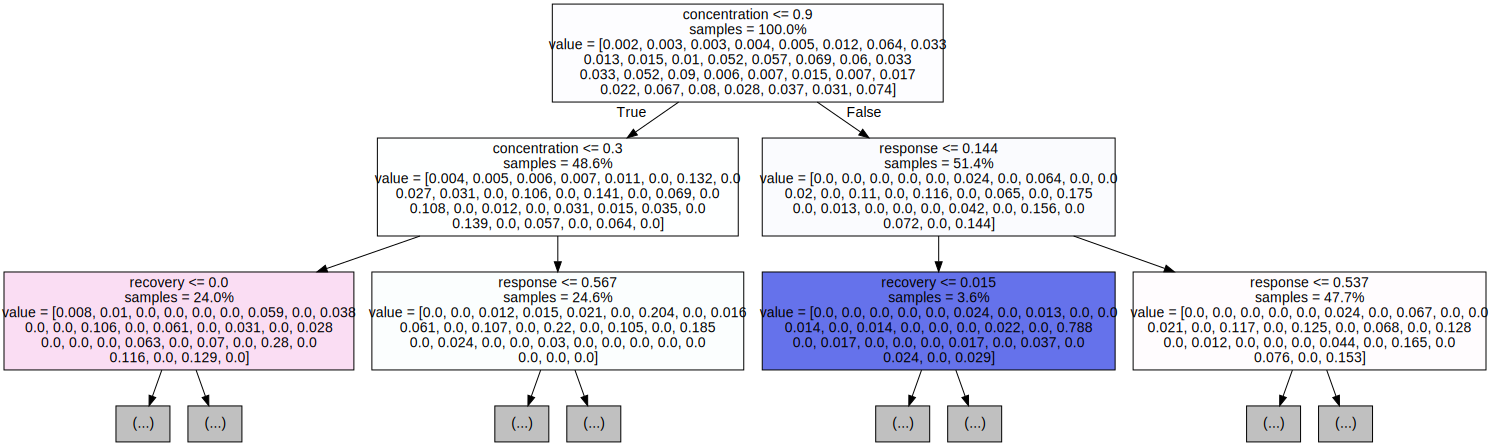

In [ ]:
for i in range(100):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_x.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

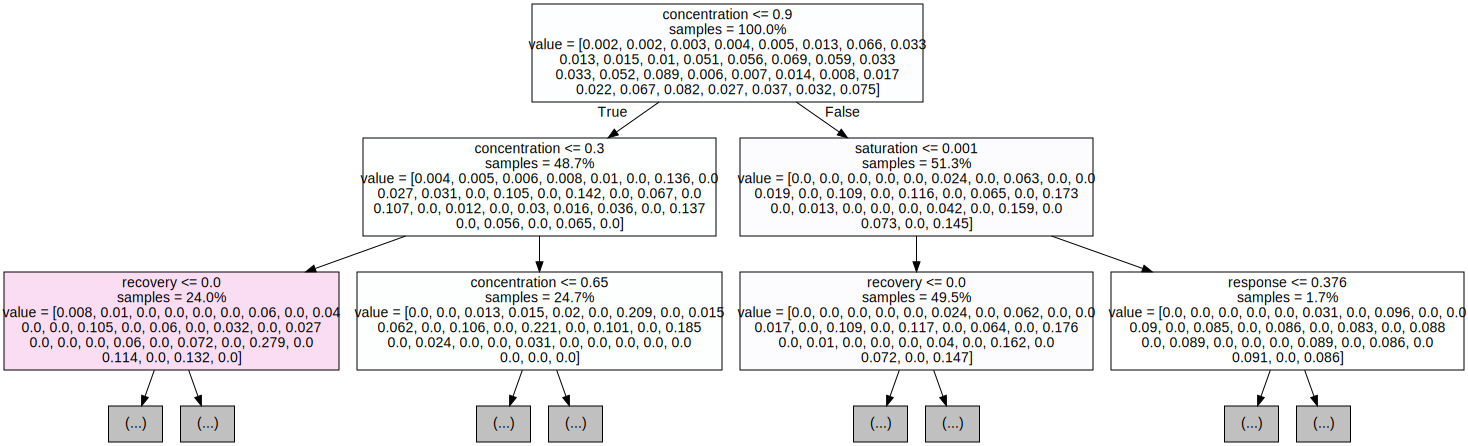

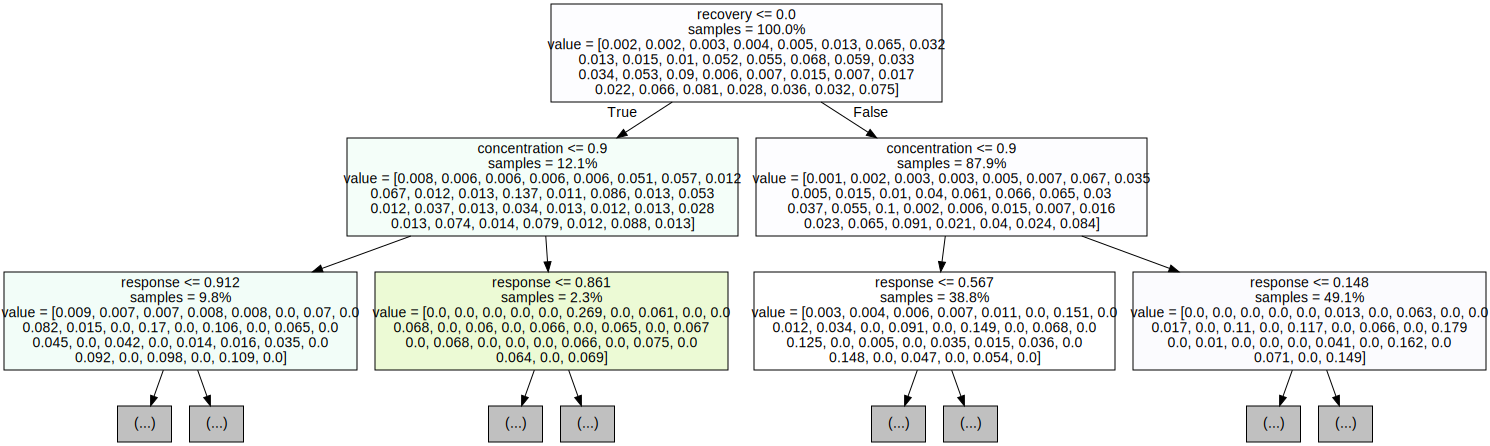

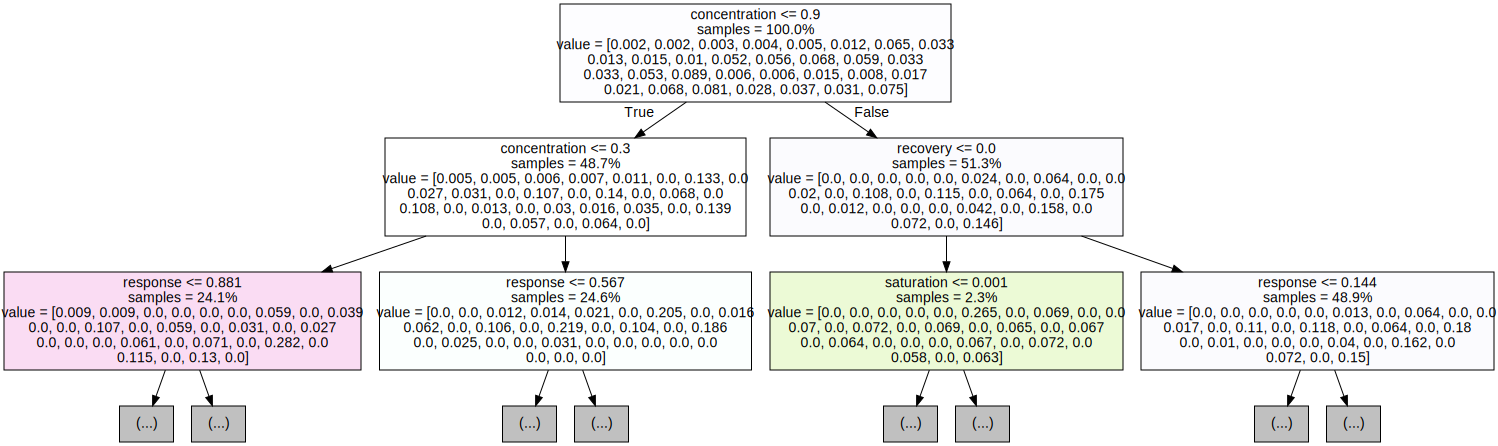

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_x.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)